# Introduction

PUBG stands for Player's Unkown Battlegrounds, which is a multiplayer game that is available on various platforms which are Windows, Android, IOS, etc. The game features different modes, the three different modes are Classic, Arcade, and EvoGround. In classic, the player will be provided with different maps that range from Erangel, Miramar, Sanhok, and Vikendi. In the arcade mode, there are War, Mini-Zone, Quick Match, and Sniper Training. There are 555 Million Players worldwide playing PUBG on all different platforms, with this huge number comes the ranking difficulty. The basic match of Battle Royal consists of 100 people playing a match with only 1 Winner (who can have Chicken Dinner). Ranking these players on basis of different attributes becomes difficult as there is a possibility of some players with more than one similar ranking.

# Project requirement

1.Prepare a complete data analysis report on the given data

2.Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game.

In [1]:
import numpy as np
import pandas as pd
import dask
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
# import sweetviz as sv
import warnings as wn
wn.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)

### In case of Google Colab usage

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/AI Course/Internship project/PRCP-1012-GameWinnerPred/Data/pubg.csv')

In [5]:
df = pd.read_csv(r"D:\Computer courses\Internship project\PRCP-1012-GameWinnerPred\Data\pubg.csv")

## Domain Analysis

## Feature	Description

1. Player's game ID
2. assists : 	Number of enemy players this player damaged that were killed by teammates.
3. boosts : 	Number of boost items used.
4. damageDealt : 	Total damage dealt. Note: Self inflicted damage is subtracted.
5. headshotKills : 	Number of enemy players killed with headshots.
6. heals : 	Number of healing items used.
7. DBNOs : 	Number of enemy players knocked.
8. killPlace : 	Ranking in match of number of enemy players killed.
9. killPoints : 	Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. killStreaks : 	Max number of enemy players killed in a short amount of time.
11. kills : 	Number of enemy players killed.
12. longestKill : 	Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13. matchDuration : 	Duration of match in seconds.
14. matchId	ID :  to identify matches. There are no matches that are in both the training and testing set.
15. matchType : 	String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. rankPoints : 	Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
17. revives : 	Number of times this player revived teammates	.
18. rideDistance : 	Total distance traveled in vehicles measured in meters.
19. roadKills : 	Number of kills while in a vehicle.
20. swimDistance : 	Total distance traveled by swimming measured in meters.
21. teamKills : 	Number of times this player killed a teammate.
22. vehicleDestroys : 	Number of vehicles destroyed.
23. walkDistance : 	Total distance traveled on foot measured in meters.
24. weaponsAcquired : 	Number of weapons picked up.
25. winPoints : 	Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. groupId	ID :  to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. numGroups : 	Number of groups we have data for in the match.
28. maxPlace : 	Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. winPlacePerc : 	The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Basic Checks

In [6]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0         0.00      0              0      0         60        1241      0   
1        91.47      0              0      0         57           0      0   
2        68.00      0              0      0         47           0      0   
3        32.90      0              0      0         75           0      0   
4       100.00      0              0      0         45           0      1   

   killStreaks  longestKill  matchDuration  matchType  maxPlace  numGroups  \
0            0         0.00           1306  squad-fpp        28         26   
1            0         0.00           1777  squad-fpp        26         25   
2            0         0.00           1318        duo        50         47   
3            0         0.00           1436  squad-fpp        31         30   
4            1        58.53           1424   solo-fpp        97         95   

   rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
0          -1        0        0.0000          0          0.00          0   
1        1484        0        0.0045          0         11.04          0   
2        1491        0        0.0000          0          0.00          0   
3        1408        0        0.0000          0          0.00          0   
4        1560        0        0.0000          0          0.00          0   

   vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0                0        244.80                1       1466        0.4444  
1                0       1434.00                5          0        0.6400  
2                0        161.80                2          0        0.7755  
3                0        202.70                3          0        0.1667  
4                0         49.75                2          0        0.1875

In [7]:
df.tail()

Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
4446961         0.00      0              0      0         74        1029   
4446962        44.15      0              0      0         69           0   
4446963        59.06      0              0      0         66           0   
4446964       180.40      1              1      2         11           0   
4446965       268.00      0              0      1         18           0   

         kills  killStreaks  longestKill  matchDuration  matchType  maxPlace  \
4446961      0            0         0.00           1873  squad-fpp        29   
4446962      0            0         0.00           1435       solo        93   
4446963      0            0         0.00           1321  squad-fpp        28   
4446964      2            1        98.50           1373  squad-fpp        26   
4446965      2            1        78.25           1766   solo-fpp        98   

         numGroups  rankPoints  revives  rideDistance  roadKills  \
4446961         28          -1        0        1292.0          0   
4446962         93        1501        0           0.0          0   
4446963         28        1500        0           0.0          0   
4446964         25        1418        2           0.0          0   
4446965         94        1590        0        1369.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
4446961         0.000          0                0        1019.0   
4446962         0.000          0                0          81.7   
4446963         2.184          0                0         788.7   
4446964         0.000          0                0        2748.0   
4446965         0.000          0                0        1244.0   

         weaponsAcquired  winPoints  winPlacePerc  
4446961                3       1507        0.1786  
4446962                6          0        0.2935  
4446963                4          0        0.4815  
4446964                8          0        0.8000  
4446965                5          0        0.5464

In [8]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   4.446966e+06   
mean   2.338149e-01  1.106908e+00  1.307171e+02  6.578755e-01   2.268196e-01   
std    5.885731e-01  1.715794e+00  1.707806e+02  1.145743e+00   6.021553e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.424000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.860000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.370147e+00  4.759935e+01  5.050060e+02  9.247833e-01  5.439551e-01   
std    2.679982e+00  2.746294e+01  6.275049e+02  1.558445e+00  7.109721e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.010000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  4.446966e+06   4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   2.299759e+01   1.579506e+03  4.450467e+01  4.300759e+01  8.920105e+02   
std    5.097262e+01   2.587399e+02  2.382811e+01  2.328949e+01  7.366478e+02   
min    0.000000e+00   9.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.132000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.094000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.910000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06  4.446966e+06   
mean   1.646590e-01  6.061157e+02  3.496091e-03  4.509322e+00  2.386841e-02   
std    4.721671e-01  1.498344e+03  7.337297e-02  3.050220e+01  1.673935e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.909750e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  3.823000e+03  1.200000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     4.446966e+06  4.446966e+06     4.446966e+06  4.446966e+06   
mean      7.918208e-03  1.154218e+03     3.660488e+00  6.064601e+02   
std       9.261157e-02  1.183497e+03     2.456544e+00  7.397004e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.551000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.856000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.976000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.013000e+03   

       winPlacePerc  
count  4.446965e+06  
mean   4.728216e-01  
std    3.074050e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [9]:
df.count()

Id                 4446966
groupId            4446966
matchId            4446966
assists            4446966
boosts             4446966
damageDealt        4446966
DBNOs              4446966
headshotKills      4446966
heals              4446966
killPlace          4446966
killPoints         4446966
kills              4446966
killStreaks        4446966
longestKill        4446966
matchDuration      4446966
matchType          4446966
maxPlace           4446966
numGroups          4446966
rankPoints         4446966
revives            4446966
rideDistance       4446966
roadKills          4446966
swimDistance       4446966
teamKills          4446966
vehicleDestroys    4446966
walkDistance       4446966
weaponsAcquired    4446966
winPoints          4446966
winPlacePerc       4446965
dtype: int64

In [10]:
df.min()

Id                 00000160737ebf
groupId            00000c08b5be36
matchId            0000a43bce5eec
assists                         0
boosts                          0
damageDealt                   0.0
DBNOs                           0
headshotKills                   0
heals                           0
killPlace                       1
killPoints                      0
kills                           0
killStreaks                     0
longestKill                   0.0
matchDuration                   9
matchType                crashfpp
maxPlace                        1
numGroups                       1
rankPoints                     -1
revives                         0
rideDistance                  0.0
roadKills                       0
swimDistance                  0.0
teamKills                       0
vehicleDestroys                 0
walkDistance                  0.0
weaponsAcquired                 0
winPoints                       0
winPlacePerc                  0.0
dtype: object

In [11]:
df.max()

Id                 fffffddae4e502
groupId            fffff98178ef52
matchId            fffe92232706aa
assists                        22
boosts                         33
damageDealt                6616.0
DBNOs                          53
headshotKills                  64
heals                          80
killPlace                     101
killPoints                   2170
kills                          72
killStreaks                    20
longestKill                1094.0
matchDuration                2237
matchType               squad-fpp
maxPlace                      100
numGroups                     100
rankPoints                   5910
revives                        39
rideDistance              40710.0
roadKills                      18
swimDistance               3823.0
teamKills                      12
vehicleDestroys                 5
walkDistance              25780.0
weaponsAcquired               236
winPoints                    2013
winPlacePerc                  1.0
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

## Combining 2 or more similar features into single feature

In [13]:
df['healthitems'] = df.boosts + df.heals
df['totalDistance'] = df.walkDistance + df.swimDistance + df.rideDistance

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 31 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [15]:
df1 = df.drop(['Id', 'groupId', 'matchId', 'boosts', 'heals', 'walkDistance', 'swimDistance', 'rideDistance'], axis=1).copy()
df1.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'roadKills', 'teamKills', 'vehicleDestroys', 'weaponsAcquired',
       'winPoints', 'winPlacePerc', 'healthitems', 'totalDistance'],
      dtype='object')

## Changing the categorical objects into numerical values

In [16]:
df1.matchType.unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [17]:
df1['matchType'] = df1.matchType.map({
                                        'squad-fpp' : 15,
                                        'duo' : 2,
                                        'solo-fpp' : 13,
                                        'squad' : 14,
                                        'duo-fpp' : 3,
                                        'solo' : 12,
                                        'normal-squad-fpp' : 11,
                                        'crashfpp' : 0,
                                        'flaretpp' : 5,
                                        'normal-solo-fpp' : 9,
                                        'flarefpp' : 4,
                                        'normal-duo-fpp' : 7,
                                        'normal-duo' : 6,
                                        'normal-squad' : 10,
                                        'crashtpp' : 1,
                                        'normal-solo' : 8,
                                        })

In [18]:
df1.matchType.unique()

array([15,  2, 13, 14,  3, 12, 11,  0,  5,  9,  4,  7,  6, 10,  1,  8],
      dtype=int64)

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int64  
 1   damageDealt      float64
 2   DBNOs            int64  
 3   headshotKills    int64  
 4   killPlace        int64  
 5   killPoints       int64  
 6   kills            int64  
 7   killStreaks      int64  
 8   longestKill      float64
 9   matchDuration    int64  
 10  matchType        int64  
 11  maxPlace         int64  
 12  numGroups        int64  
 13  rankPoints       int64  
 14  revives          int64  
 15  roadKills        int64  
 16  teamKills        int64  
 17  vehicleDestroys  int64  
 18  weaponsAcquired  int64  
 19  winPoints        int64  
 20  winPlacePerc     float64
 21  healthitems      int64  
 22  totalDistance    float64
dtypes: float64(4), int64(19)
memory usage: 780.3 MB


## Changing the datatype to reduce the size of the dataset

In [20]:
for cols in df1.columns:
    dtype = df1[cols].dtype
    if dtype.kind in ['i']:
        df1[cols] = df1[cols].astype('int16')
    else:
        df1[cols] = df1[cols].astype('float32')

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 23 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int16  
 1   damageDealt      float32
 2   DBNOs            int16  
 3   headshotKills    int16  
 4   killPlace        int16  
 5   killPoints       int16  
 6   kills            int16  
 7   killStreaks      int16  
 8   longestKill      float32
 9   matchDuration    int16  
 10  matchType        int16  
 11  maxPlace         int16  
 12  numGroups        int16  
 13  rankPoints       int16  
 14  revives          int16  
 15  roadKills        int16  
 16  teamKills        int16  
 17  vehicleDestroys  int16  
 18  weaponsAcquired  int16  
 19  winPoints        int16  
 20  winPlacePerc     float32
 21  healthitems      int16  
 22  totalDistance    float32
dtypes: float32(4), int16(19)
memory usage: 229.0 MB


<Axes: >

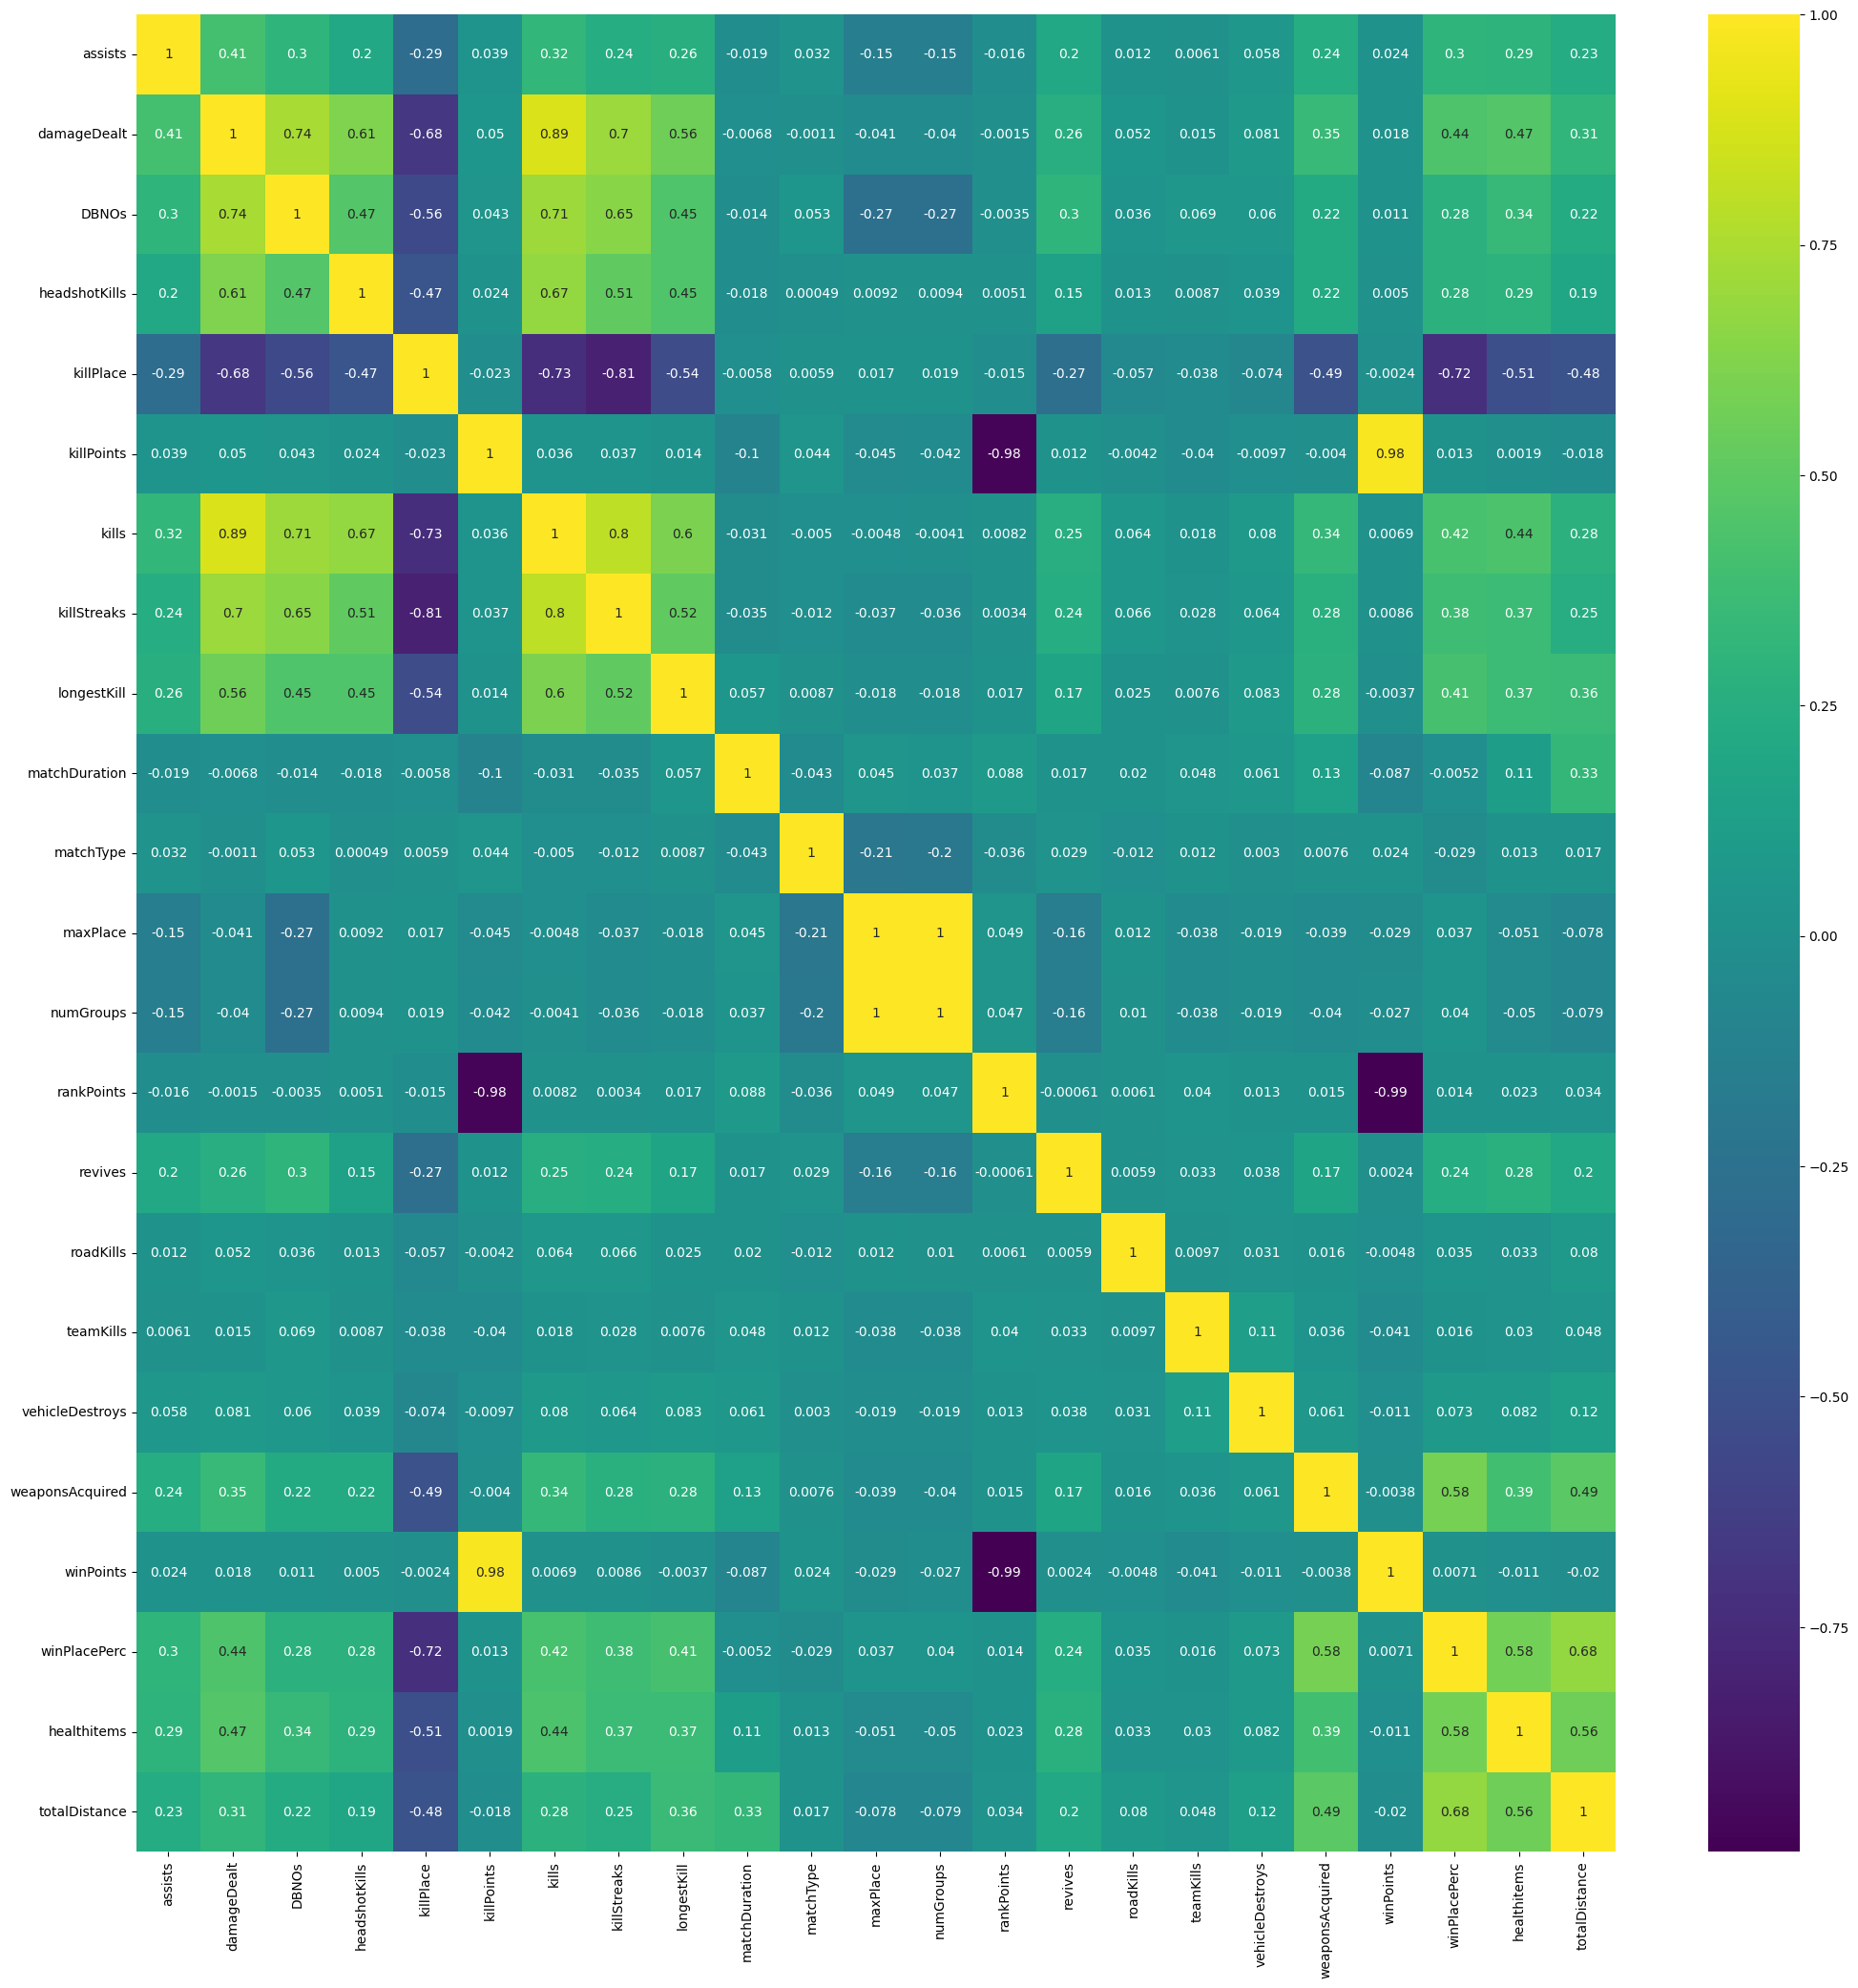

In [22]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(), annot=True, cmap = 'viridis')

In [23]:
# dropping killPoints & winPoints, numGroups
df1 = df1.drop(['killPoints', 'winPoints', 'numGroups'], axis=1)
df1.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'rankPoints', 'revives', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc', 'healthitems',
       'totalDistance'],
      dtype='object')

<Axes: >

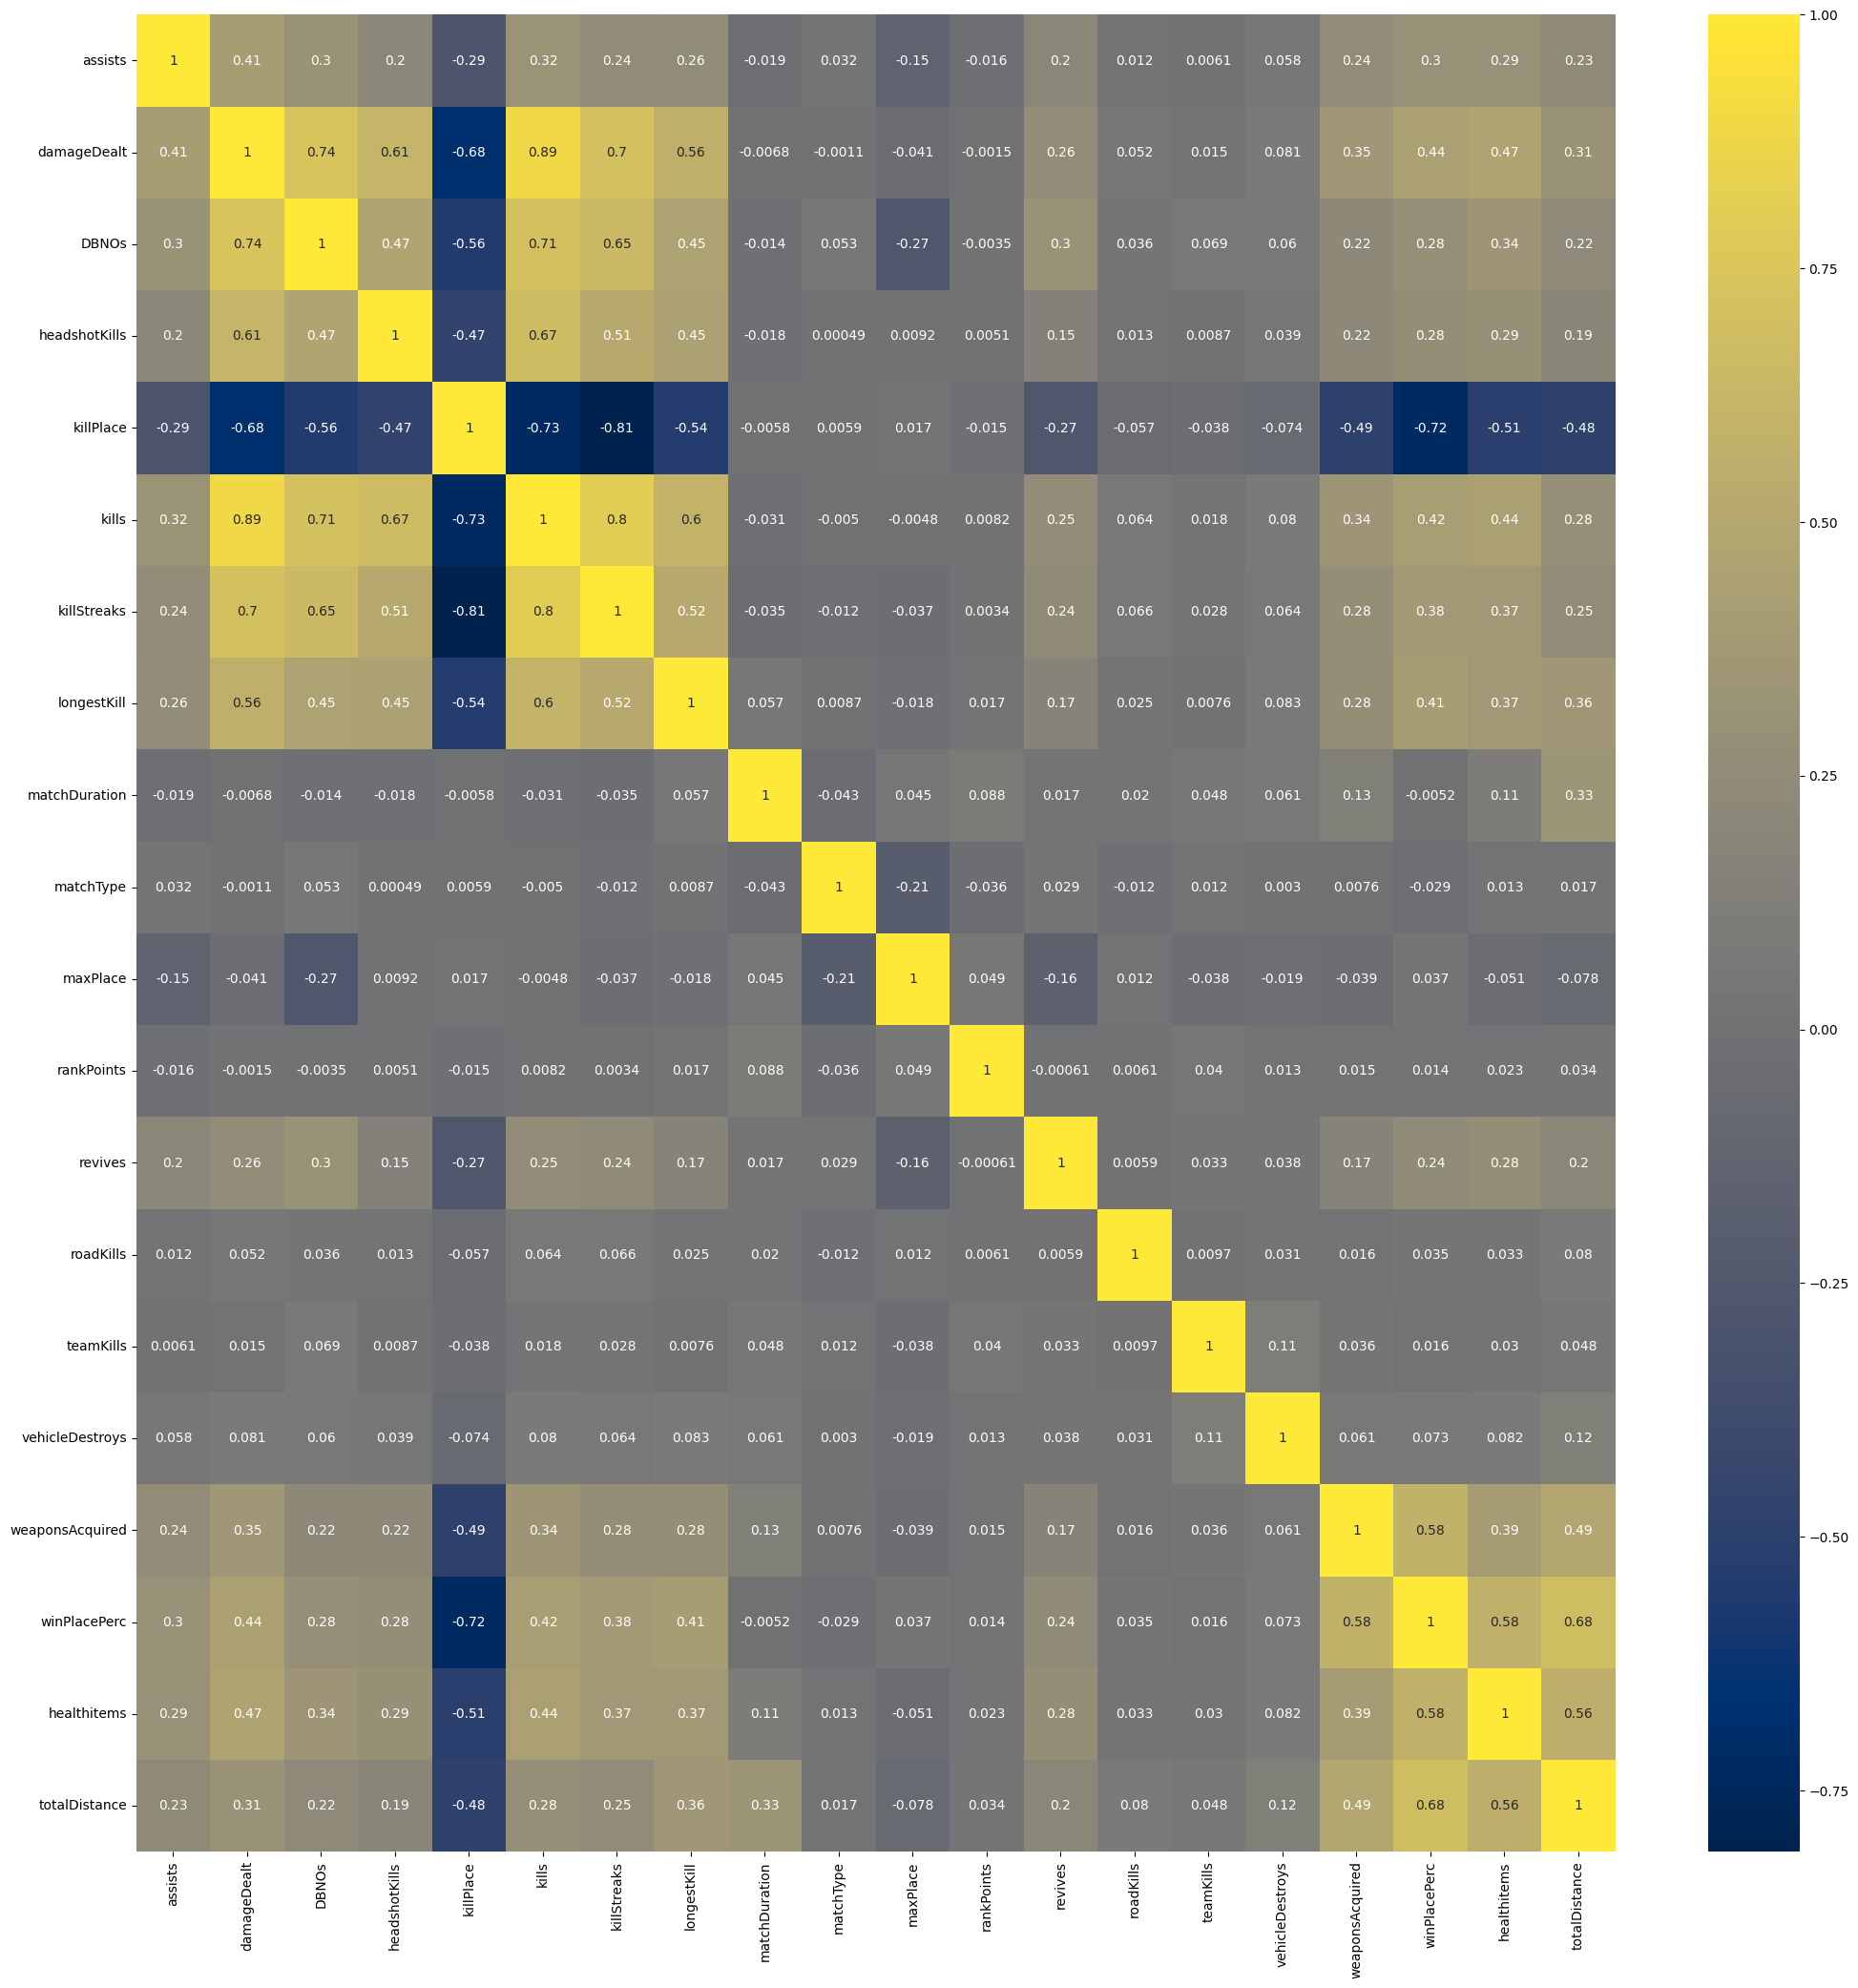

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(), annot=True, cmap = 'cividis')

In [25]:
for cols in df1.columns:
    unique_values = np.unique(df1[cols])
    print('No of values in ',cols,' = ', len(unique_values))

No of values in  assists  =  20
No of values in  damageDealt  =  29916
No of values in  DBNOs  =  39
No of values in  headshotKills  =  34
No of values in  killPlace  =  101
No of values in  kills  =  58
No of values in  killStreaks  =  18
No of values in  longestKill  =  28284
No of values in  matchDuration  =  1267
No of values in  matchType  =  16
No of values in  maxPlace  =  100
No of values in  rankPoints  =  2262
No of values in  revives  =  25
No of values in  roadKills  =  14
No of values in  teamKills  =  11
No of values in  vehicleDestroys  =  6
No of values in  weaponsAcquired  =  97
No of values in  winPlacePerc  =  3001
No of values in  healthitems  =  70
No of values in  totalDistance  =  326947


In [26]:
df1.count()

assists            4446966
damageDealt        4446966
DBNOs              4446966
headshotKills      4446966
killPlace          4446966
kills              4446966
killStreaks        4446966
longestKill        4446966
matchDuration      4446966
matchType          4446966
maxPlace           4446966
rankPoints         4446966
revives            4446966
roadKills          4446966
teamKills          4446966
vehicleDestroys    4446966
weaponsAcquired    4446966
winPlacePerc       4446965
healthitems        4446966
totalDistance      4446966
dtype: int64

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   assists          int16  
 1   damageDealt      float32
 2   DBNOs            int16  
 3   headshotKills    int16  
 4   killPlace        int16  
 5   kills            int16  
 6   killStreaks      int16  
 7   longestKill      float32
 8   matchDuration    int16  
 9   matchType        int16  
 10  maxPlace         int16  
 11  rankPoints       int16  
 12  revives          int16  
 13  roadKills        int16  
 14  teamKills        int16  
 15  vehicleDestroys  int16  
 16  weaponsAcquired  int16  
 17  winPlacePerc     float32
 18  healthitems      int16  
 19  totalDistance    float32
dtypes: float32(4), int16(16)
memory usage: 203.6 MB


In [28]:
print(df1.columns)

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'rankPoints', 'revives', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc', 'healthitems',
       'totalDistance'],
      dtype='object')


## Exploratory Data Analysis

### Assists

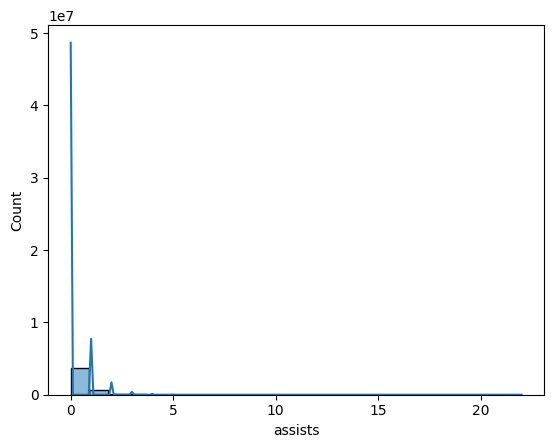

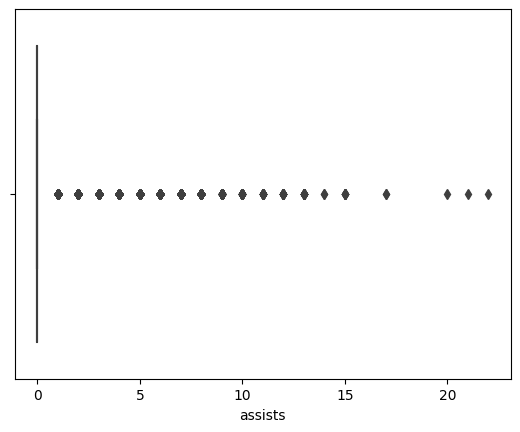

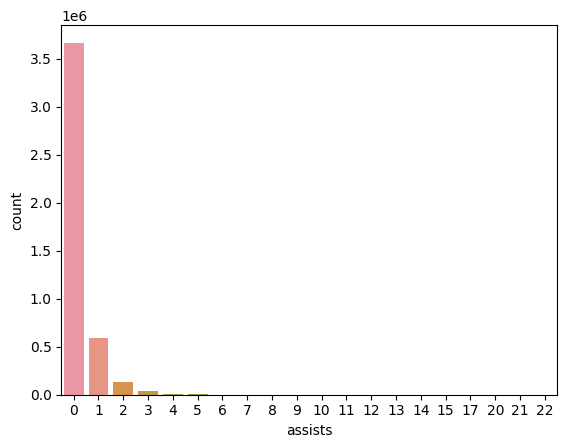

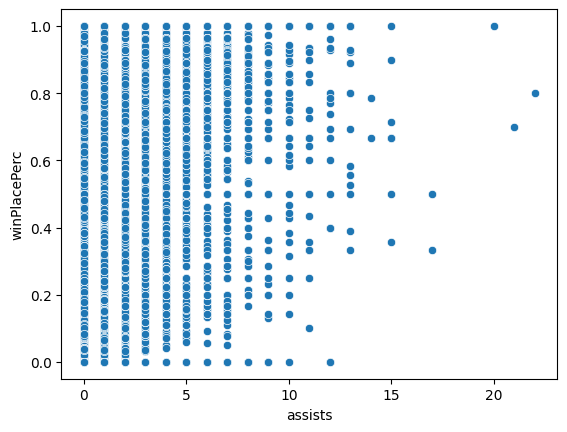

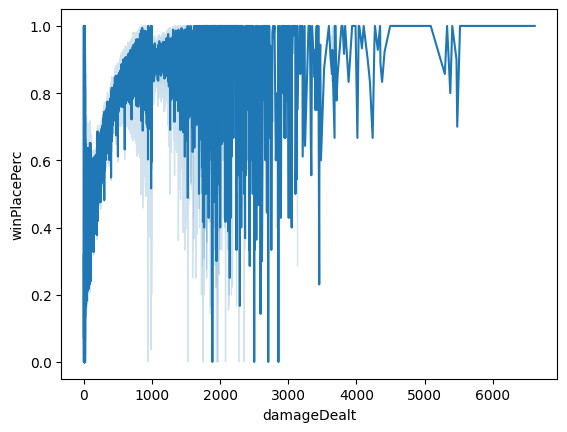

In [29]:
sns.histplot(x=df1.assists, kde = True)
plt.show()
sns.boxplot(x=df1.assists)
plt.show()
sns.countplot(x=df1.assists)
plt.show()
sns.scatterplot(x=df1.assists, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.damageDealt, y=df1.winPlacePerc)
plt.show()

### Damage Dealt

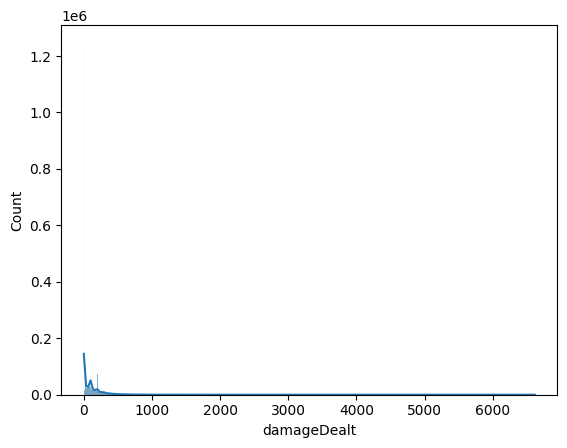

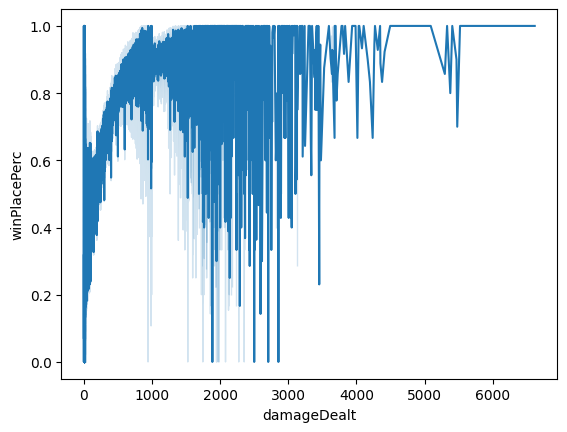

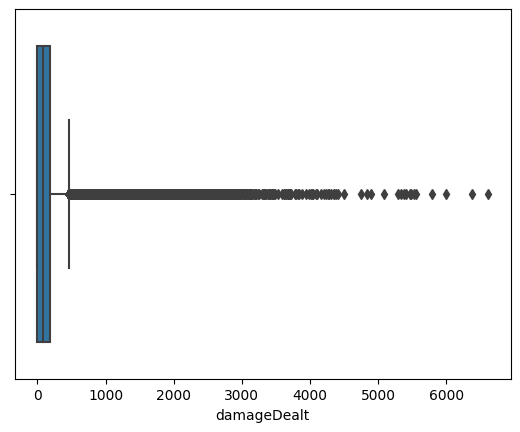

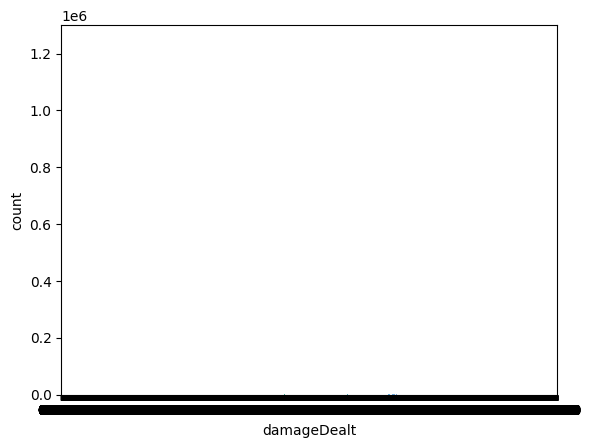

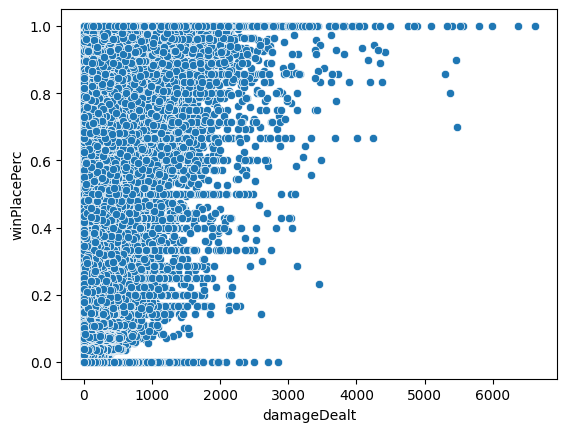

In [30]:
sns.histplot(x=df1.damageDealt, kde = True)
plt.show()
sns.lineplot(x=df1.damageDealt, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.damageDealt)
plt.show()
# sns.barplot(x=df1.damageDealt)
plt.show()
sns.countplot(x=df1.damageDealt)
plt.show()
sns.scatterplot(x=df1.damageDealt, y=df1.winPlacePerc)
plt.show()

### DBNOs

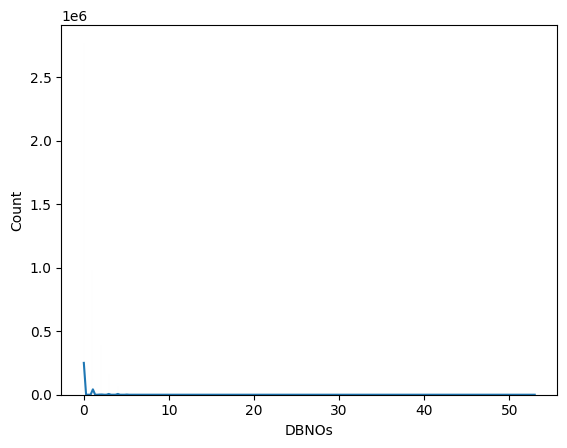

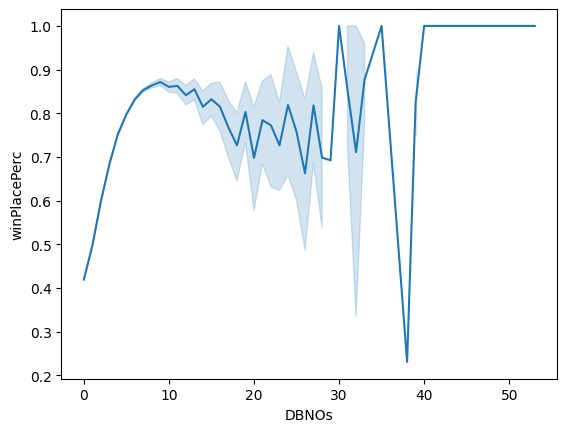

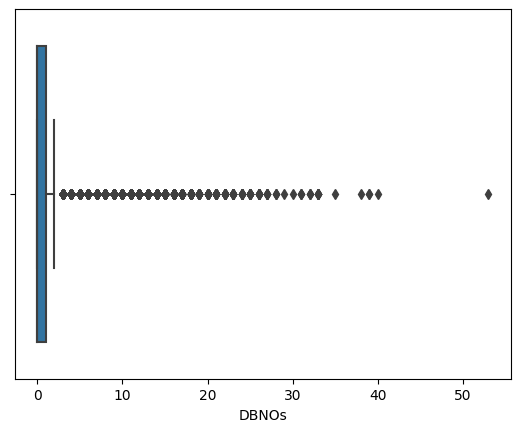

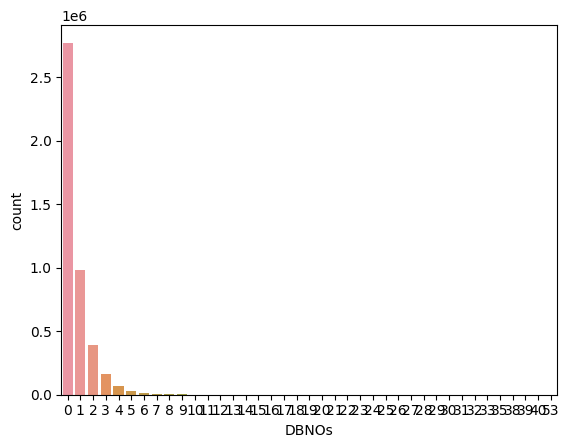

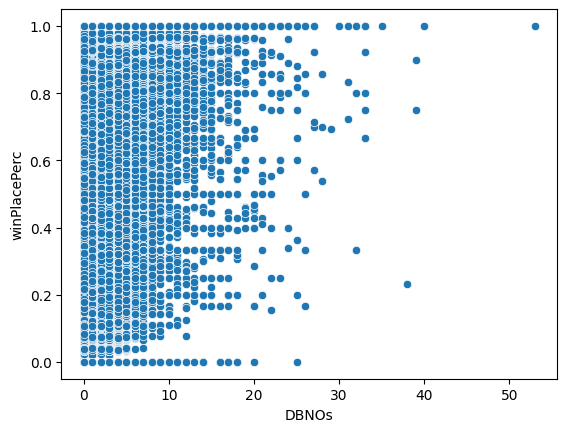

In [31]:
sns.histplot(x=df1.DBNOs, kde = True)
plt.show()
sns.lineplot(x=df1.DBNOs, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.DBNOs)
plt.show()
# sns.barplot(x=df1.DBNOs)
plt.show()
sns.countplot(x=df1.DBNOs)
plt.show()
sns.scatterplot(x=df1.DBNOs, y=df1.winPlacePerc)
plt.show()

### headshotKills

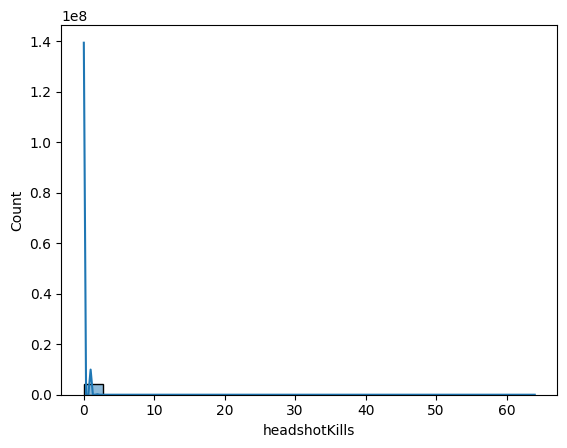

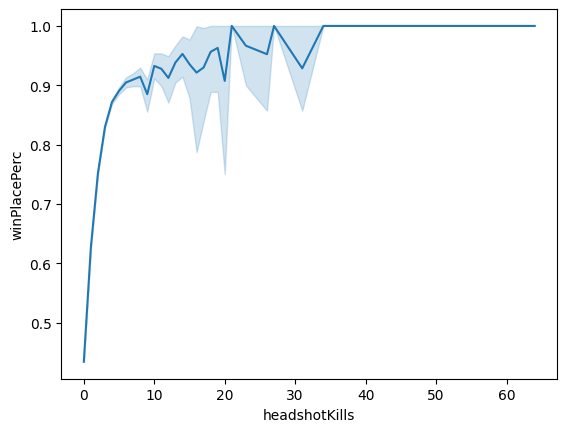

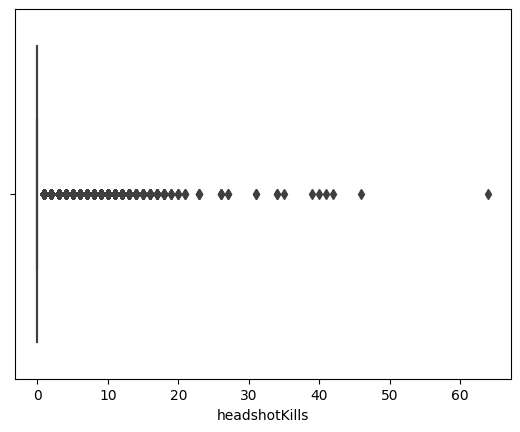

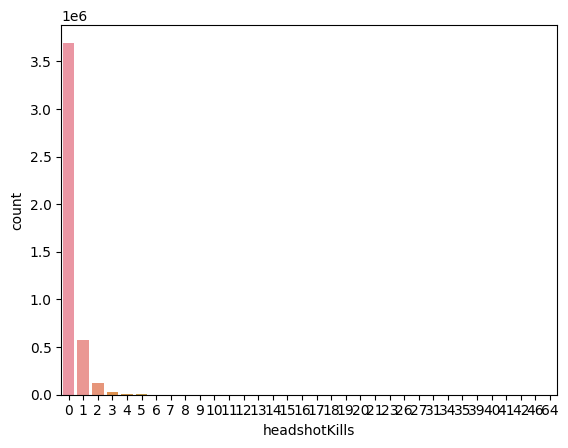

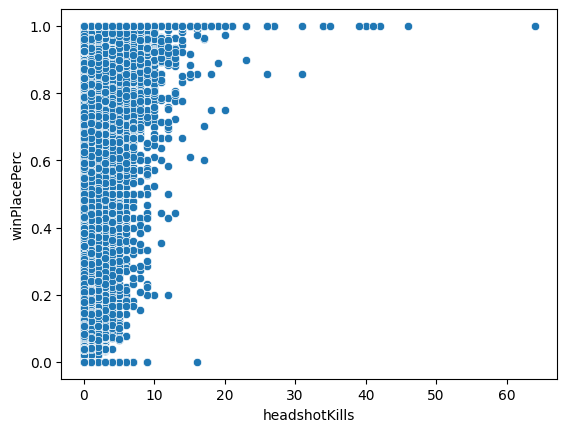

In [32]:
sns.histplot(x=df1.headshotKills, kde = True)
plt.show()
sns.lineplot(x=df1.headshotKills, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.headshotKills)
plt.show()
# sns.barplot(x=df1.headshotKills)
plt.show()
sns.countplot(x=df1.headshotKills)
plt.show()
sns.scatterplot(x=df1.headshotKills, y=df1.winPlacePerc)
plt.show()

### killPlace

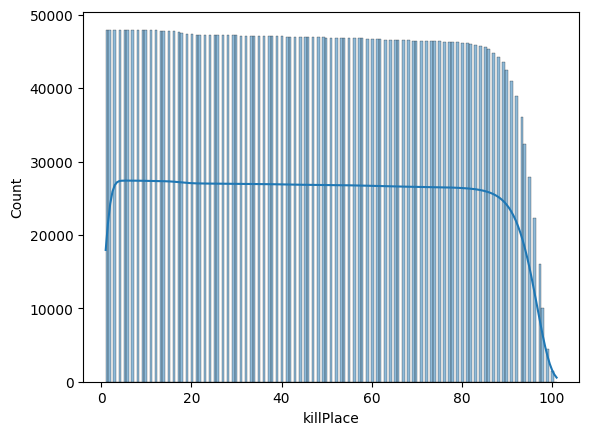

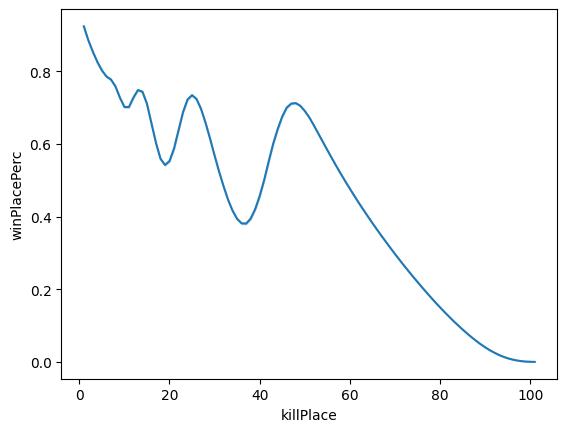

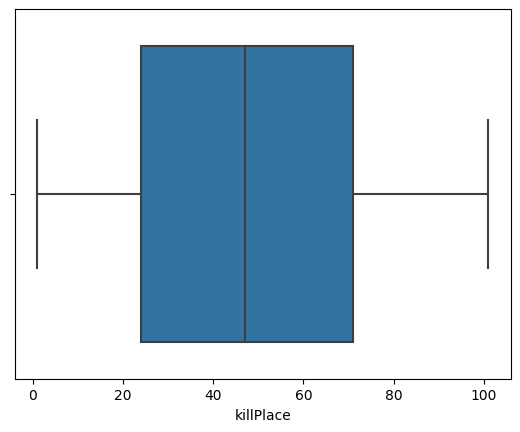

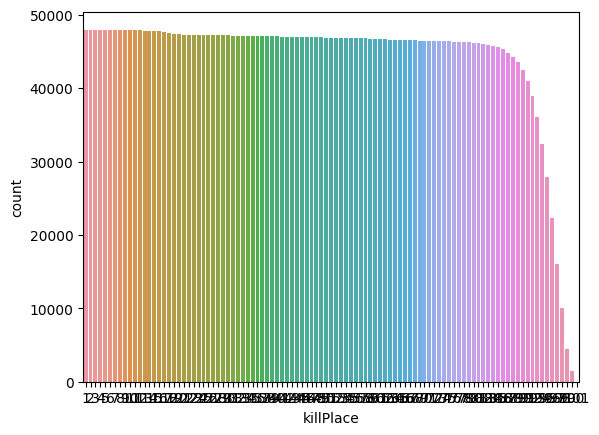

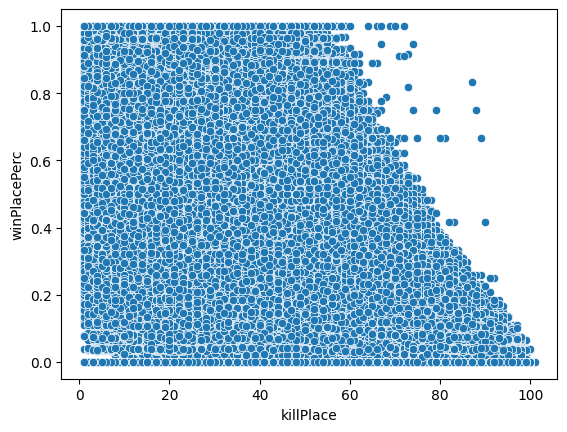

In [33]:
sns.histplot(x=df1.killPlace, kde = True)
plt.show()
sns.lineplot(x=df1.killPlace, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.killPlace)
plt.show()
# sns.barplot(x=df1.killPlace)
plt.show()
sns.countplot(x=df1.killPlace)
plt.show()
sns.scatterplot(x=df1.killPlace, y=df1.winPlacePerc)
plt.show()

### kills

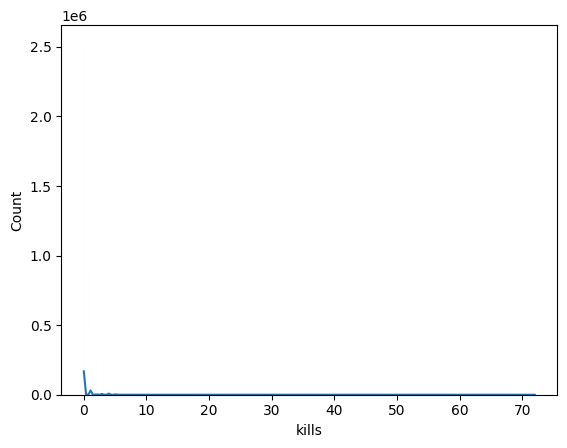

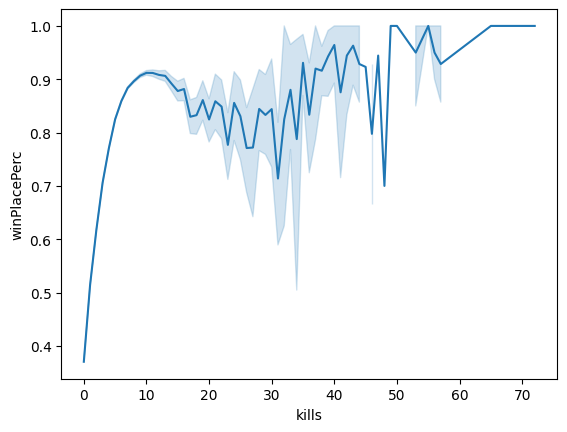

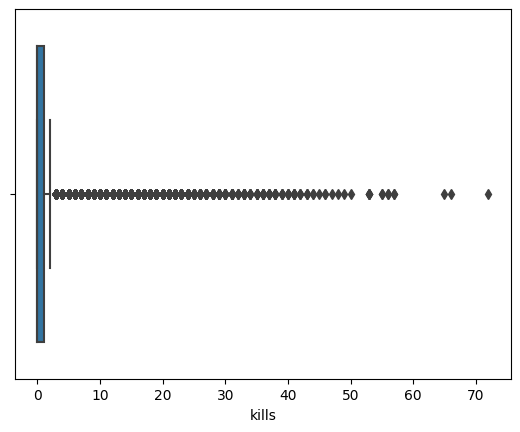

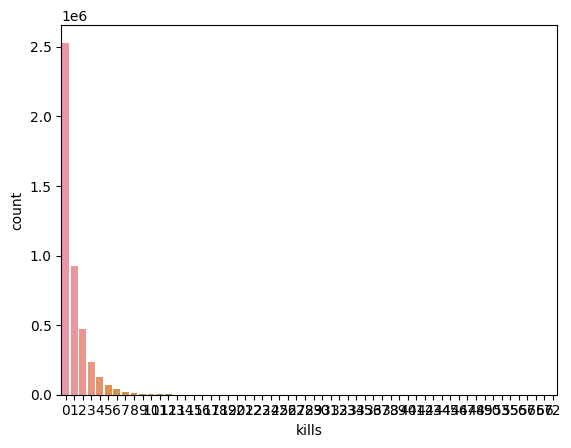

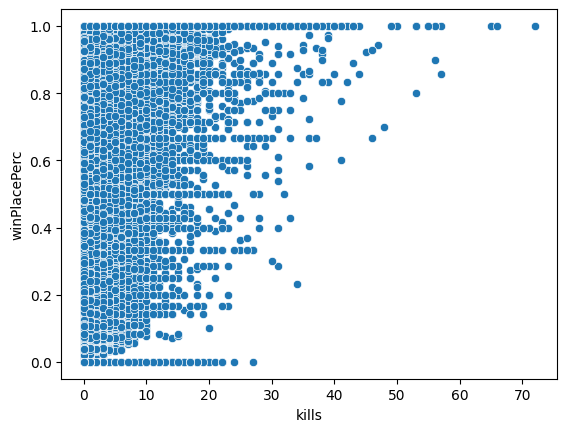

In [34]:
sns.histplot(x=df1.kills, kde = True)
plt.show()
sns.lineplot(x=df1.kills, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.kills)
plt.show()
# sns.barplot(x=df1.kills)
plt.show()
sns.countplot(x=df1.kills)
plt.show()
sns.scatterplot(x=df1.kills, y=df1.winPlacePerc)
plt.show()

### killStreaks

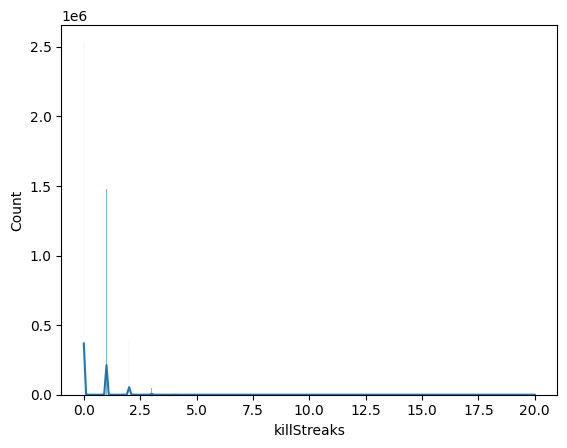

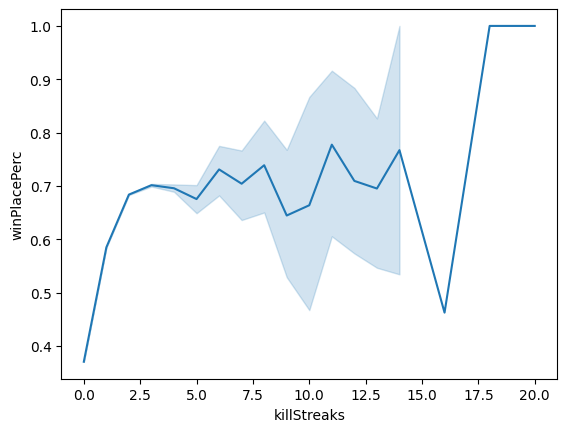

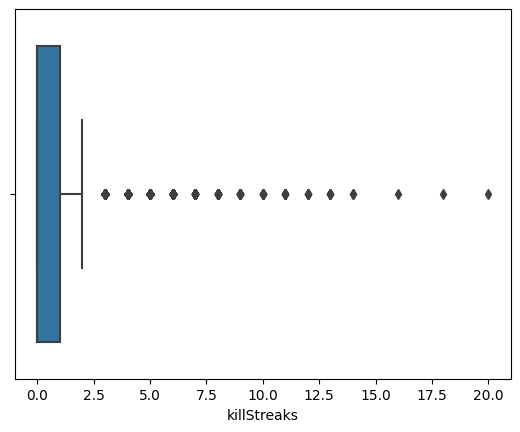

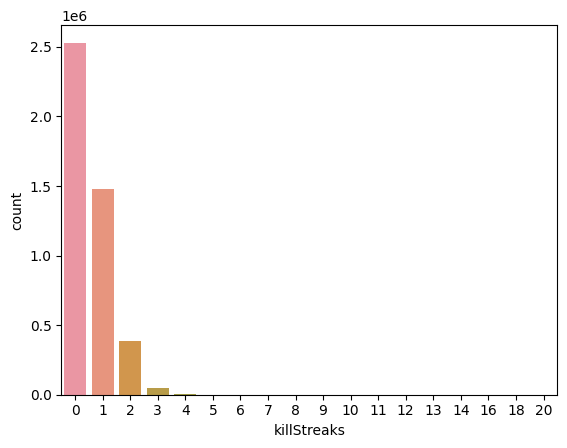

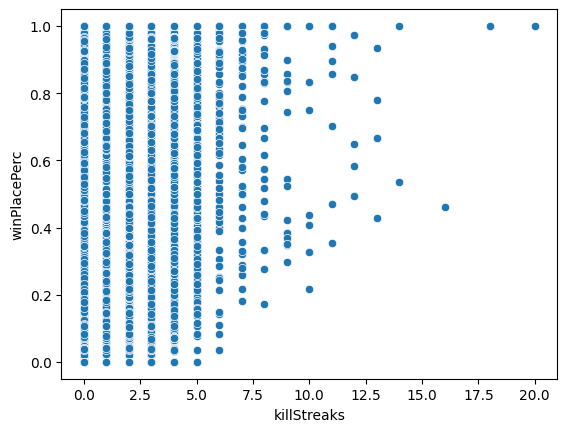

In [35]:
sns.histplot(x=df1.killStreaks, kde = True)
plt.show()
sns.lineplot(x=df1.killStreaks, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.killStreaks)
plt.show()
# sns.barplot(x=df1.killStreaks)
plt.show()
sns.countplot(x=df1.killStreaks)
plt.show()
sns.scatterplot(x=df1.killStreaks, y=df1.winPlacePerc)
plt.show()

### longestKill

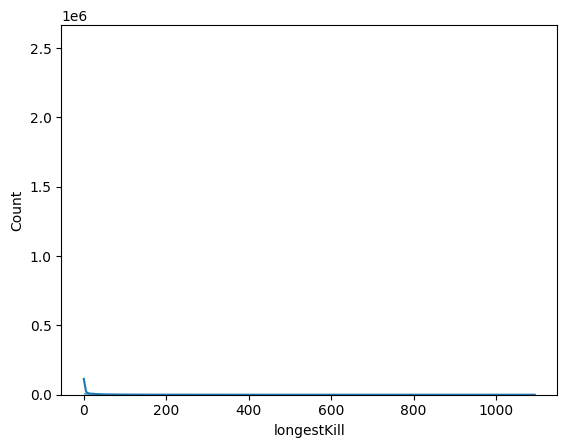

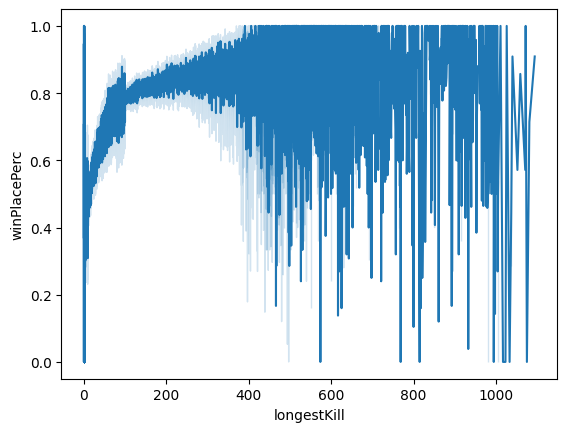

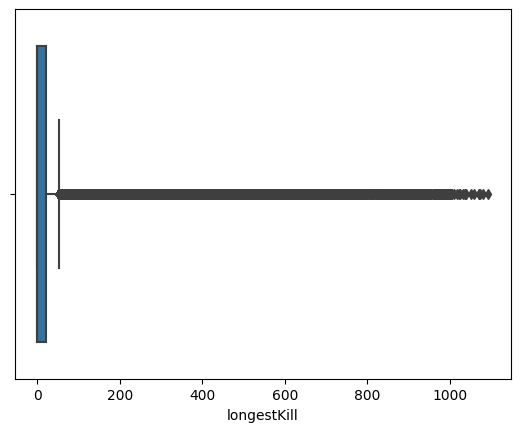

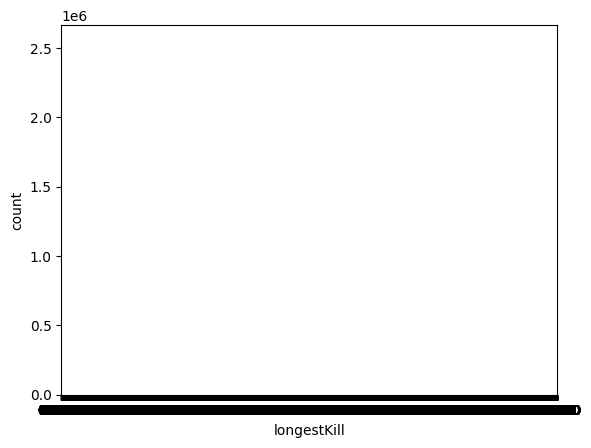

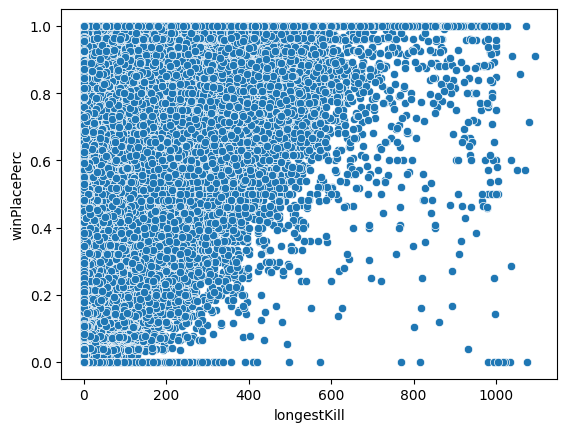

In [36]:
sns.histplot(x=df1.longestKill, kde = True)
plt.show()
sns.lineplot(x=df1.longestKill, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.longestKill)
plt.show()
# sns.barplot(x=df1.longestKill)
plt.show()
sns.countplot(x=df1.longestKill)
plt.show()
sns.scatterplot(x=df1.longestKill, y=df1.winPlacePerc)
plt.show()

### matchDuration

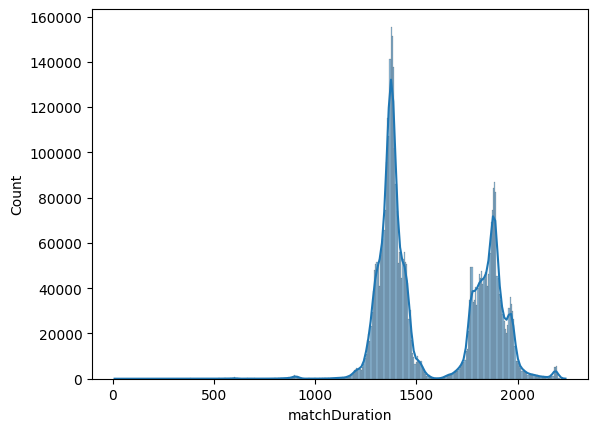

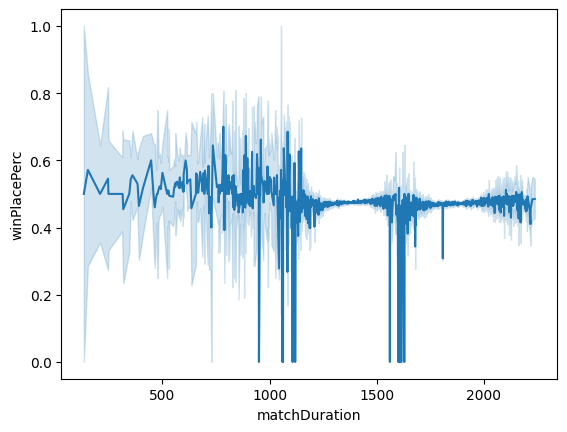

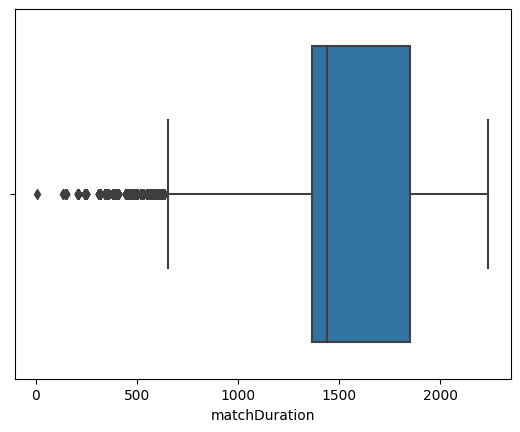

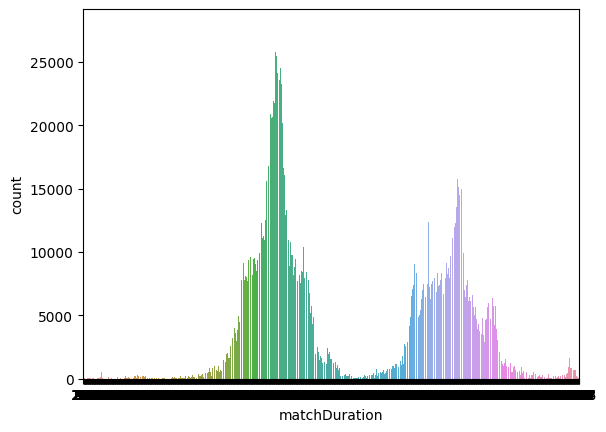

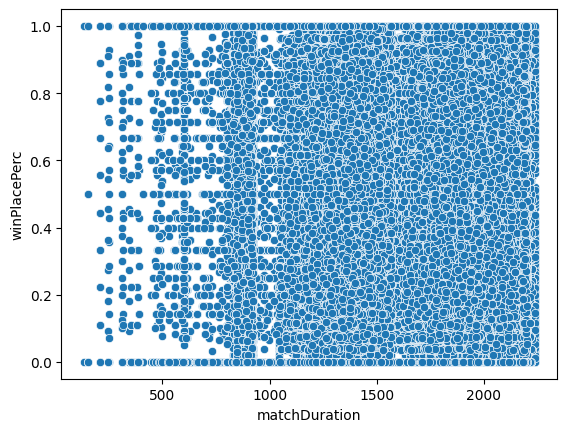

In [37]:
sns.histplot(x=df1.matchDuration, kde = True)
plt.show()
sns.lineplot(x=df1.matchDuration, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.matchDuration)
plt.show()
# sns.barplot(x=df1.matchDuration)
plt.show()
sns.countplot(x=df1.matchDuration)
plt.show()
sns.scatterplot(x=df1.matchDuration, y=df1.winPlacePerc)
plt.show()

### matchType

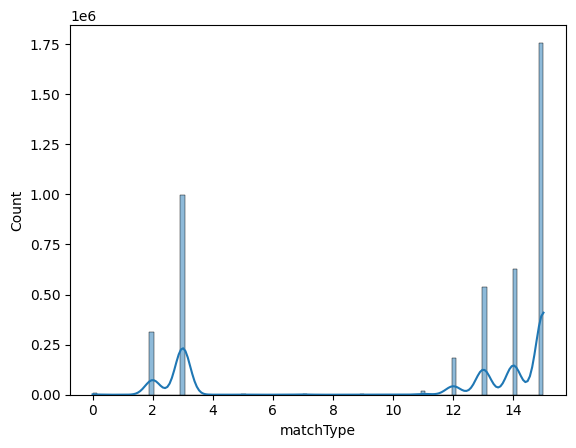

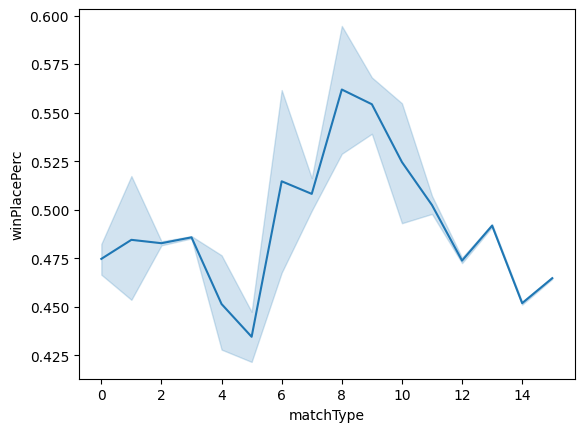

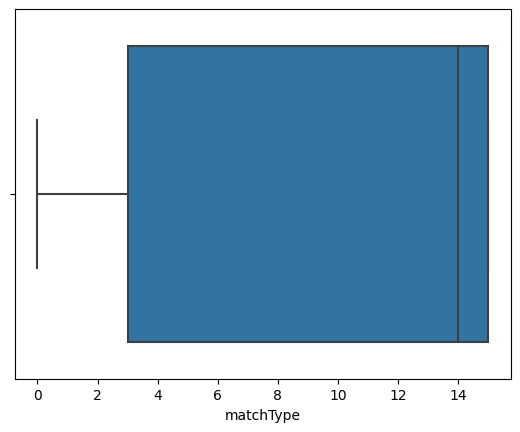

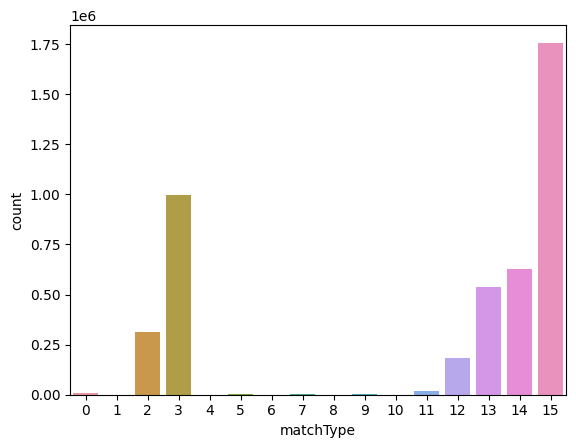

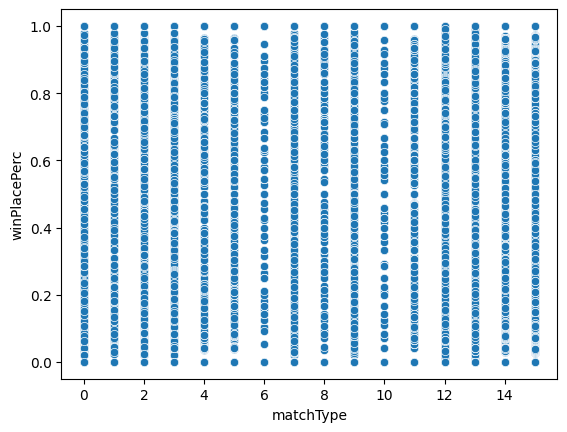

In [38]:
sns.histplot(x=df1.matchType, kde = True)
plt.show()
sns.lineplot(x=df1.matchType, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.matchType)
plt.show()
# sns.barplot(x=df1.matchType)
plt.show()
sns.countplot(x=df1.matchType)
plt.show()
sns.scatterplot(x=df1.matchType, y=df1.winPlacePerc)
plt.show()

### maxPlace

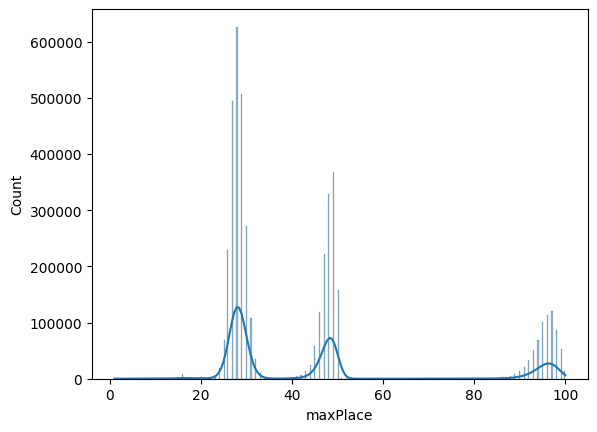

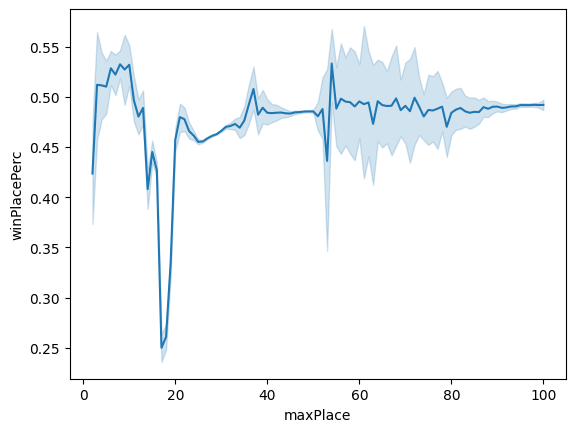

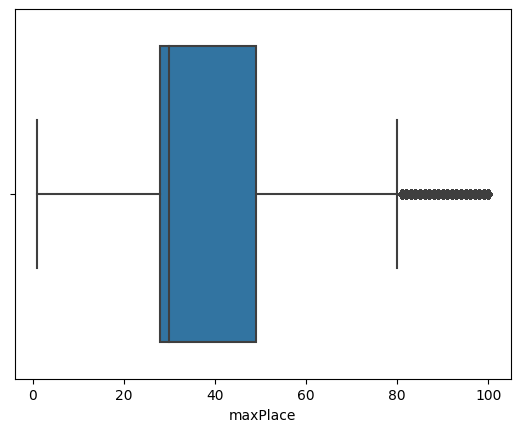

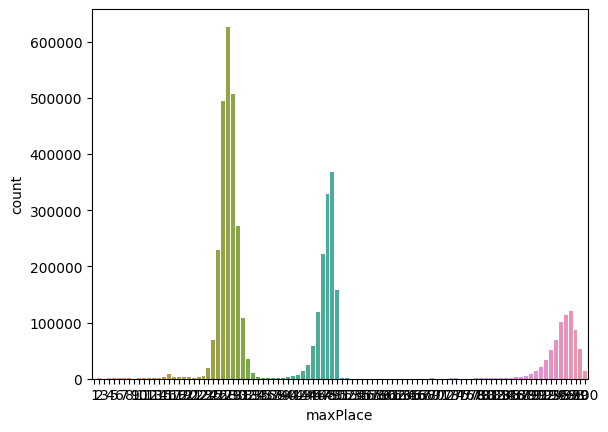

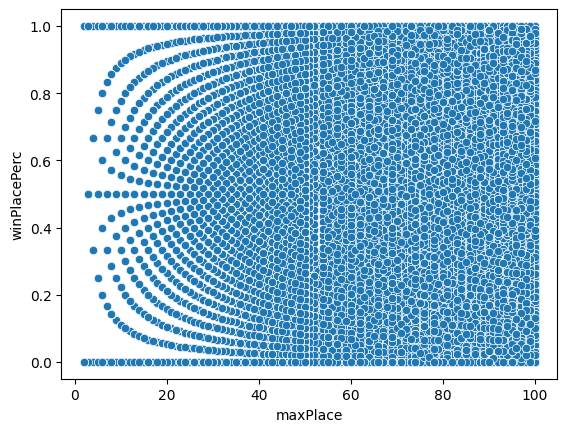

In [39]:
sns.histplot(x=df1.maxPlace, kde = True)
plt.show()
sns.lineplot(x=df1.maxPlace, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.maxPlace)
plt.show()
# sns.barplot(x=df1.maxPlace)
plt.show()
sns.countplot(x=df1.maxPlace)
plt.show()
sns.scatterplot(x=df1.maxPlace, y=df1.winPlacePerc)
plt.show()

### rankPoints

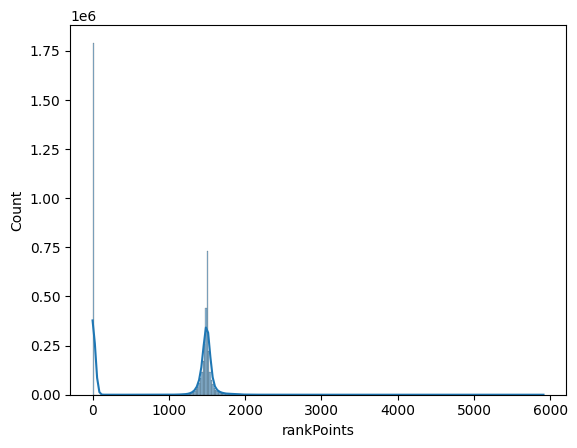

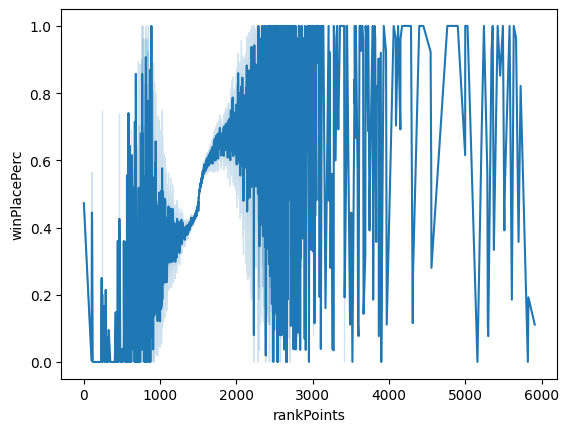

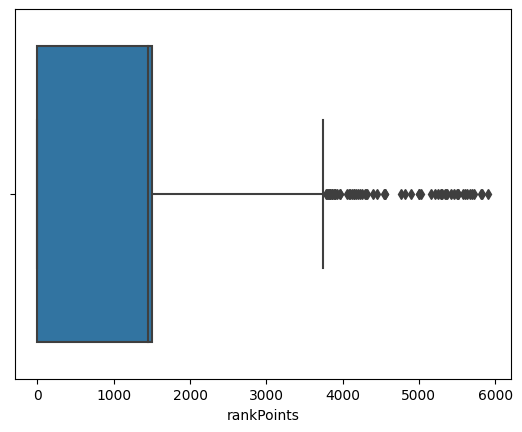

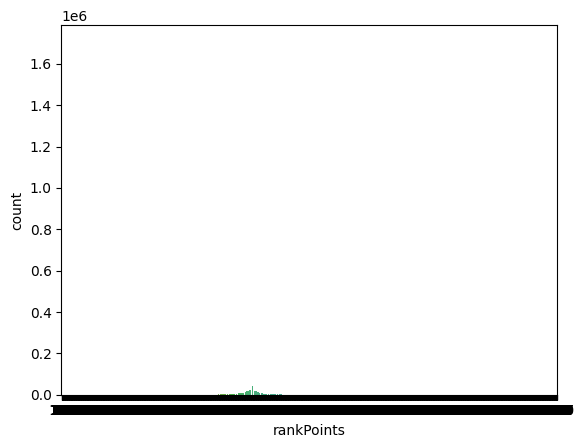

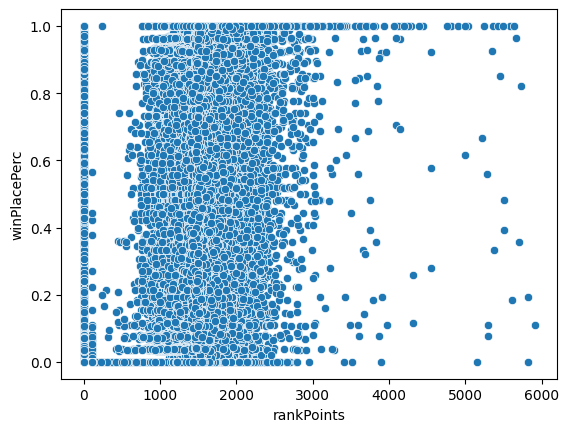

In [40]:
sns.histplot(x=df1.rankPoints, kde = True)
plt.show()
sns.lineplot(x=df1.rankPoints, y=df1.winPlacePerc)
plt.show()
sns.boxplot(x=df1.rankPoints)
plt.show()
# sns.barplot(x=df1.rankPoints)
plt.show()
sns.countplot(x=df1.rankPoints)
plt.show()
sns.scatterplot(x=df1.rankPoints, y=df1.winPlacePerc)
plt.show()

### revives

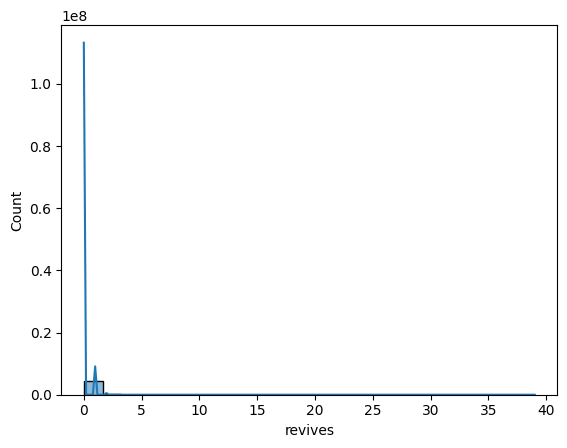

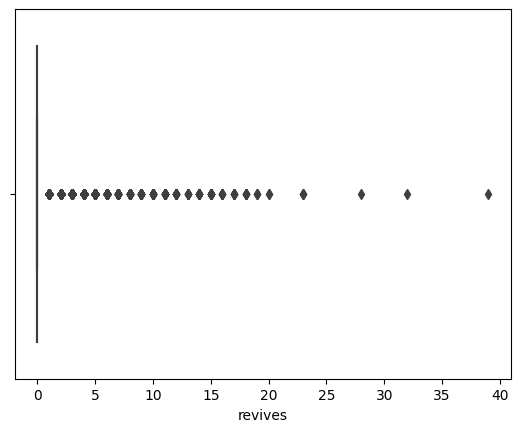

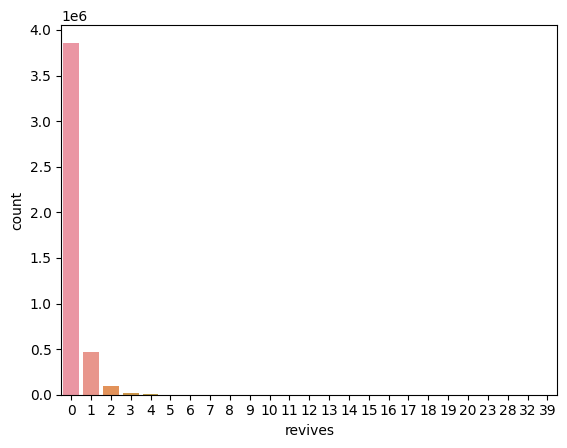

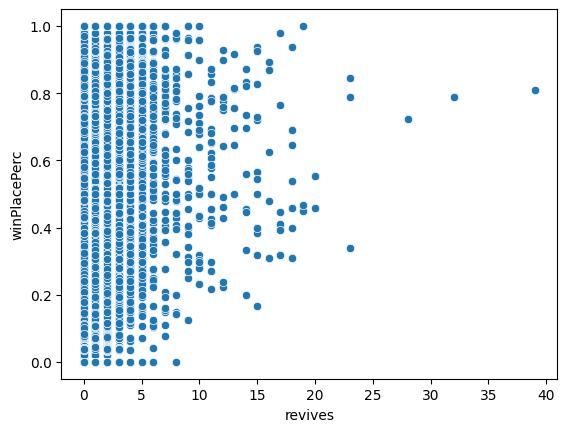

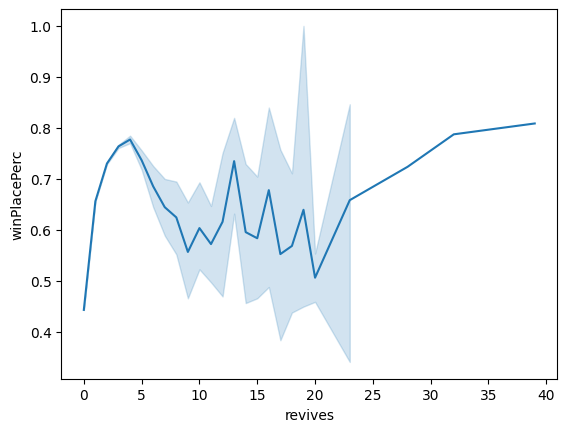

In [41]:
sns.histplot(x=df1.revives, kde = True)
plt.show()
sns.boxplot(x=df1.revives)
plt.show()
sns.countplot(x=df1.revives)
plt.show()
sns.scatterplot(x=df1.revives, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.revives, y=df1.winPlacePerc)
plt.show()

### roadKills

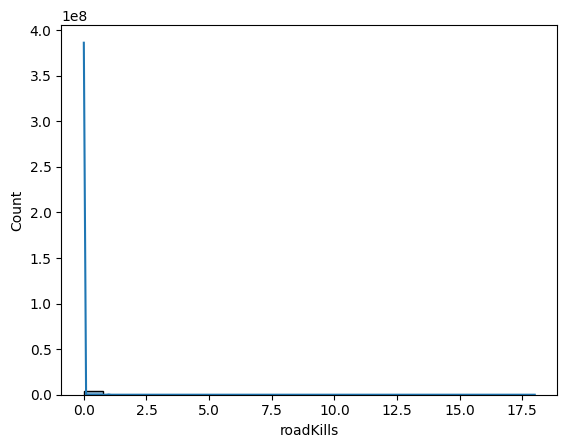

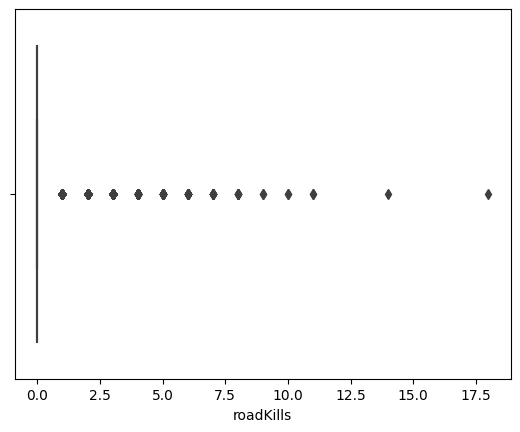

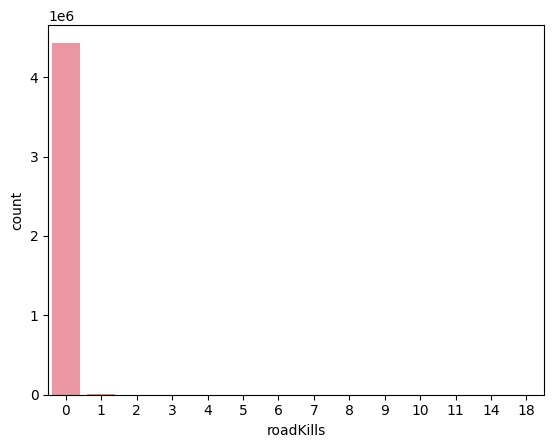

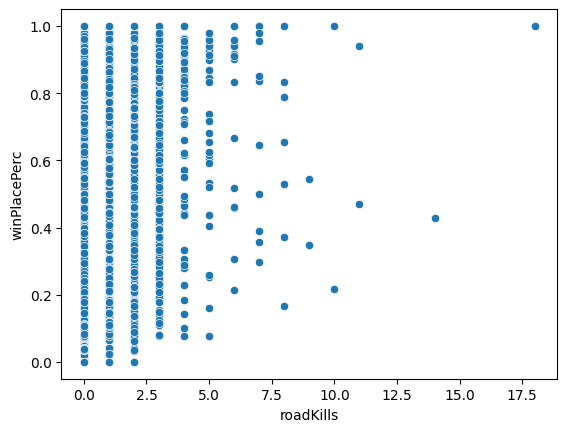

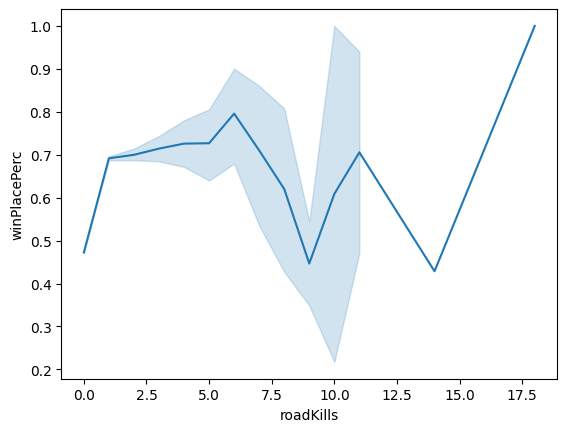

In [42]:
sns.histplot(x=df1.roadKills, kde = True)
plt.show()
sns.boxplot(x=df1.roadKills)
plt.show()
sns.countplot(x=df1.roadKills)
plt.show()
sns.scatterplot(x=df1.roadKills, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.roadKills, y=df1.winPlacePerc)
plt.show()

### teamKills

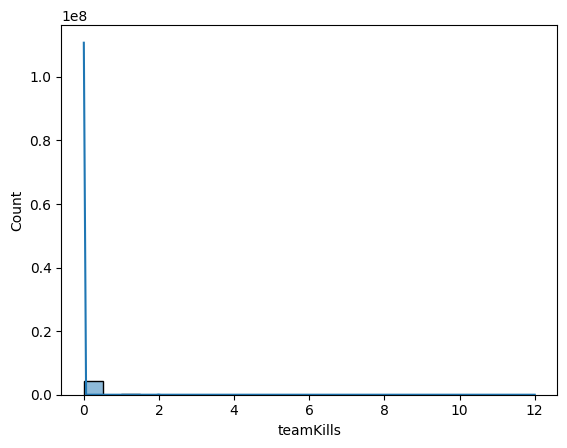

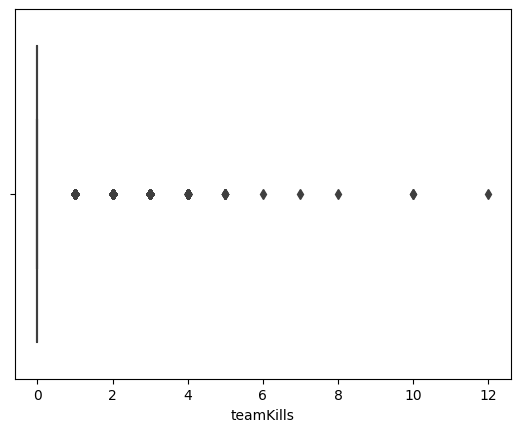

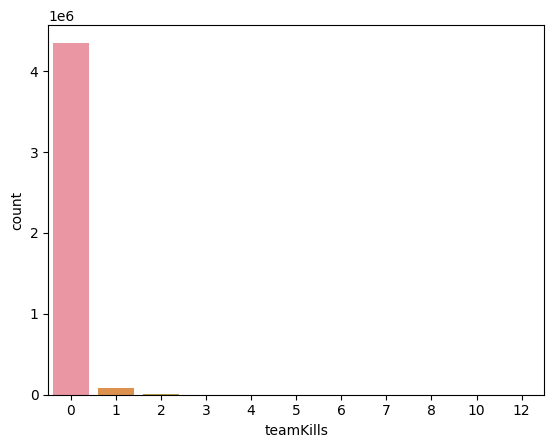

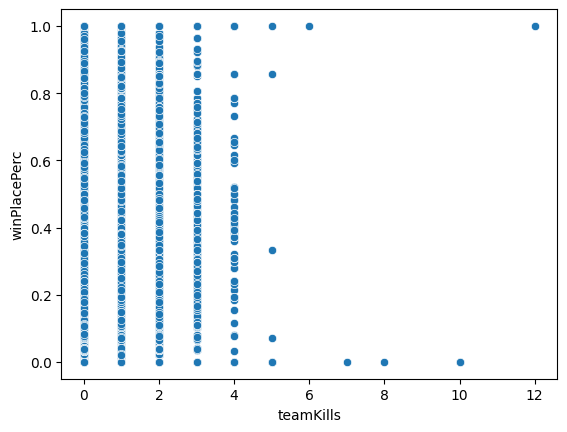

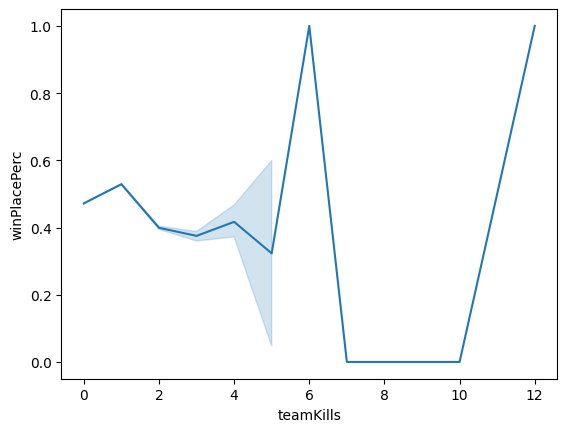

In [43]:
sns.histplot(x=df1.teamKills, kde = True)
plt.show()
sns.boxplot(x=df1.teamKills)
plt.show()
sns.countplot(x=df1.teamKills)
plt.show()
sns.scatterplot(x=df1.teamKills, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.teamKills, y=df1.winPlacePerc)
plt.show()

### vehicleDestroys

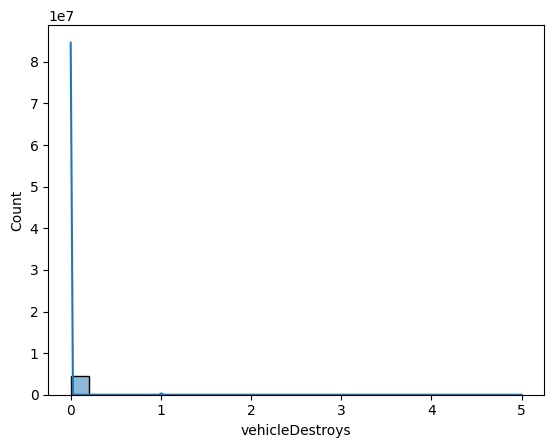

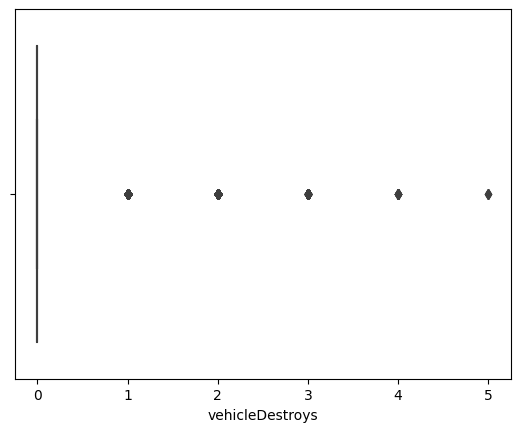

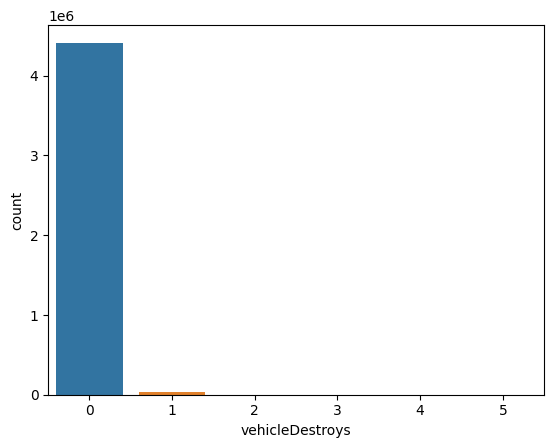

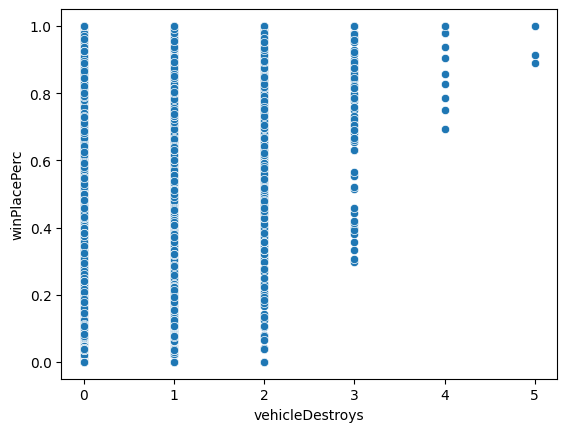

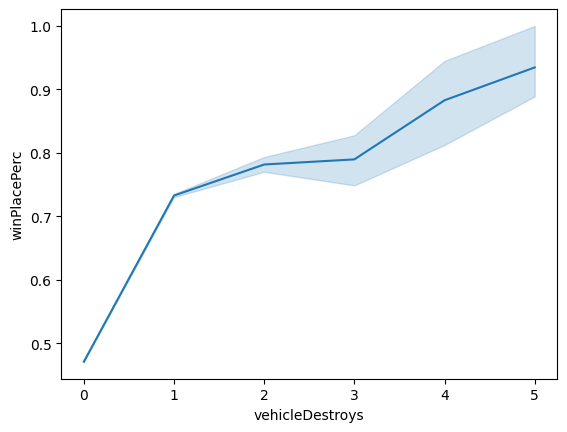

In [44]:
sns.histplot(x=df1.vehicleDestroys, kde = True)
plt.show()
sns.boxplot(x=df1.vehicleDestroys)
plt.show()
sns.countplot(x=df1.vehicleDestroys)
plt.show()
sns.scatterplot(x=df1.vehicleDestroys, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.vehicleDestroys, y=df1.winPlacePerc)
plt.show()

### weaponsAcquired

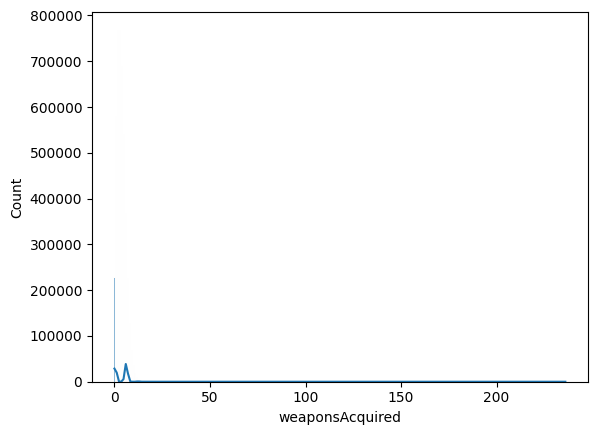

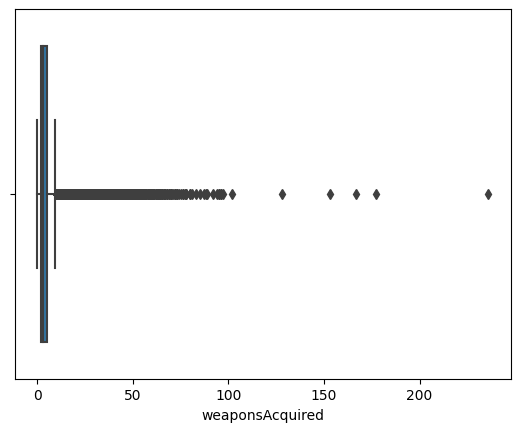

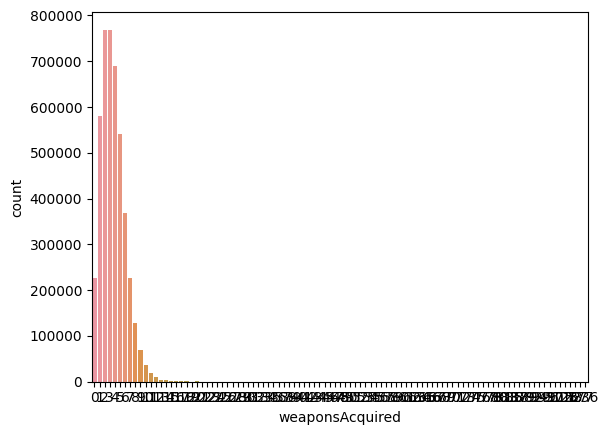

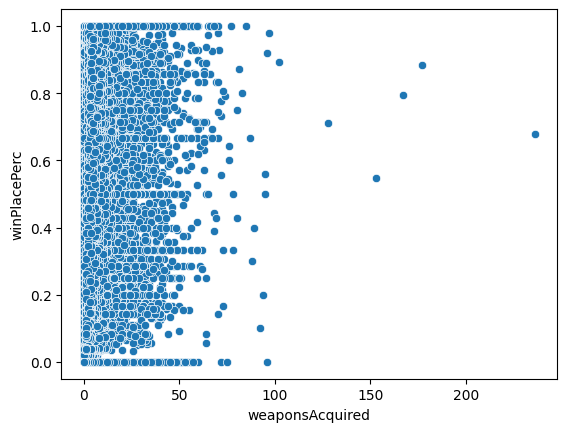

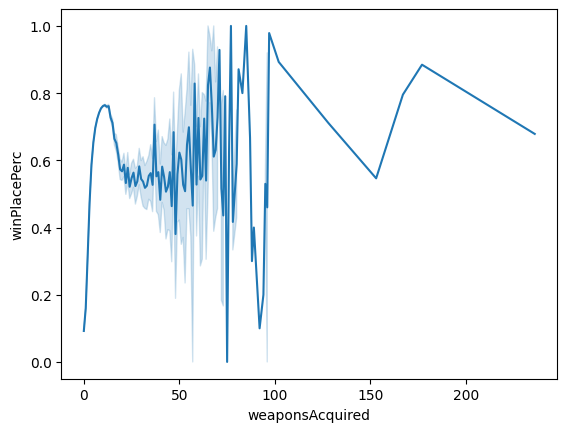

In [45]:
sns.histplot(x=df1.weaponsAcquired, kde = True)
plt.show()
sns.boxplot(x=df1.weaponsAcquired)
plt.show()
sns.countplot(x=df1.weaponsAcquired)
plt.show()
sns.scatterplot(x=df1.weaponsAcquired, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.weaponsAcquired, y=df1.winPlacePerc)
plt.show()

### winPlacePerc

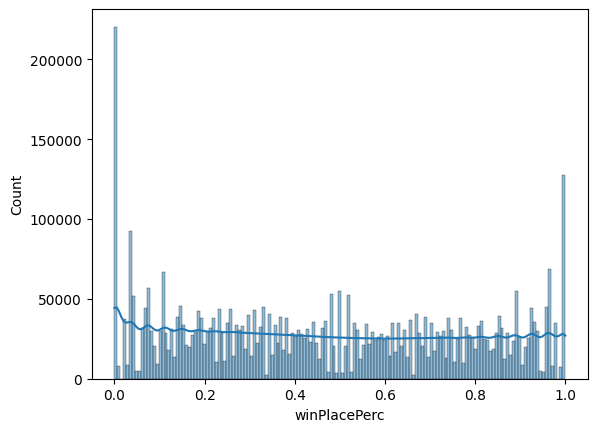

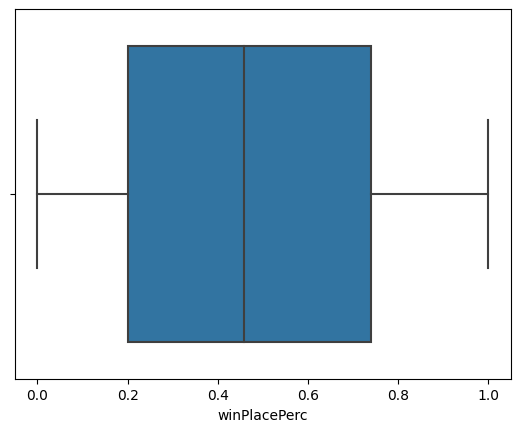

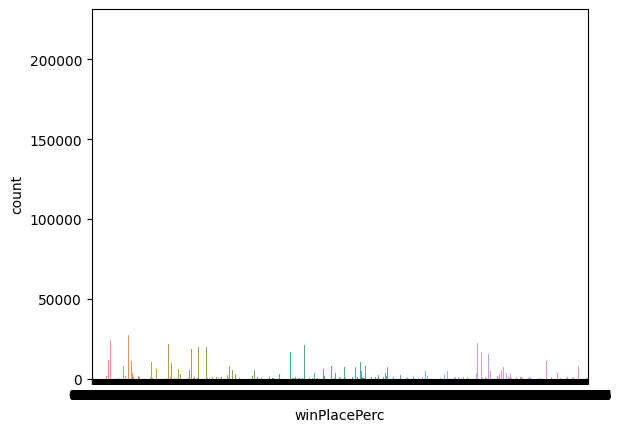

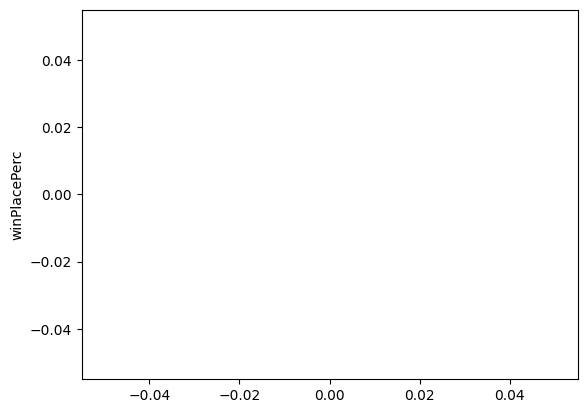

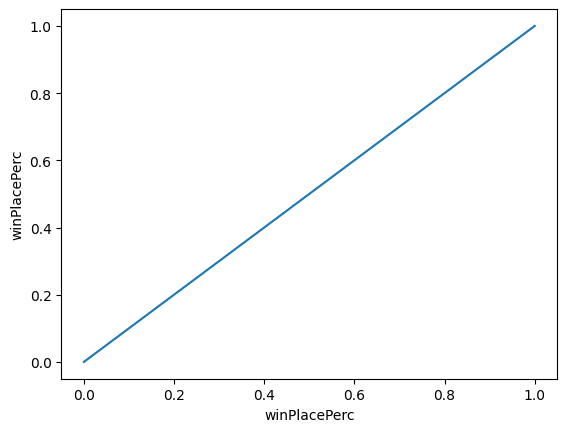

In [46]:
sns.histplot(x=df1.winPlacePerc, kde = True)
plt.show()
sns.boxplot(x=df1.winPlacePerc)
plt.show()
sns.countplot(x=df1.winPlacePerc)
plt.show()
sns.scatterplot(y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.winPlacePerc, y=df1.winPlacePerc)
plt.show()

### healthitems

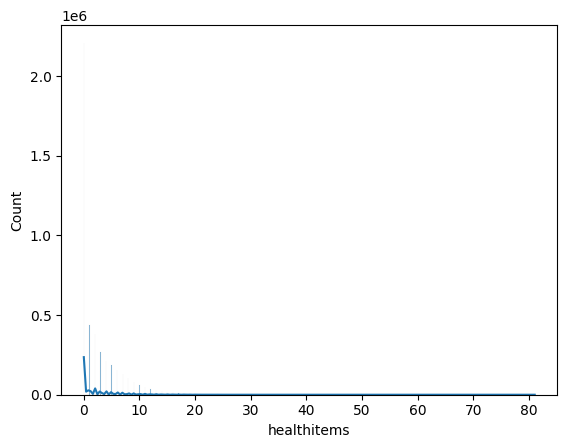

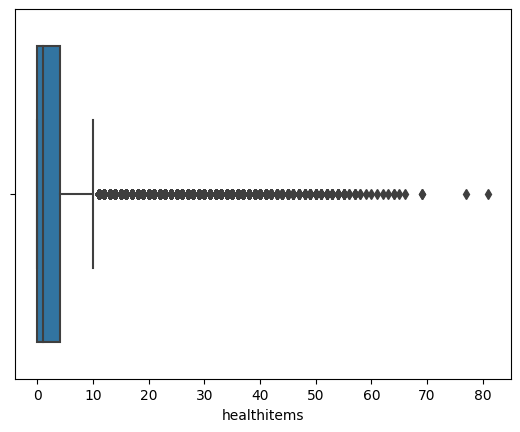

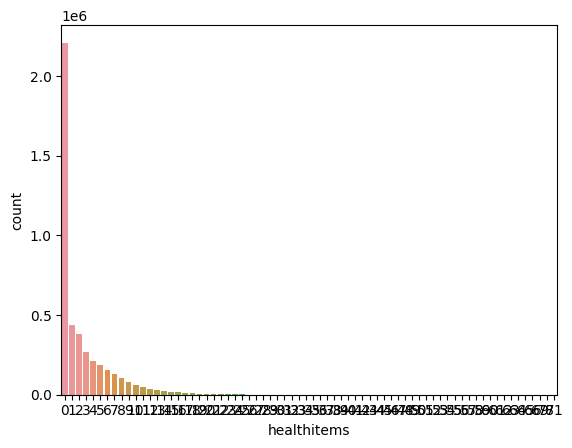

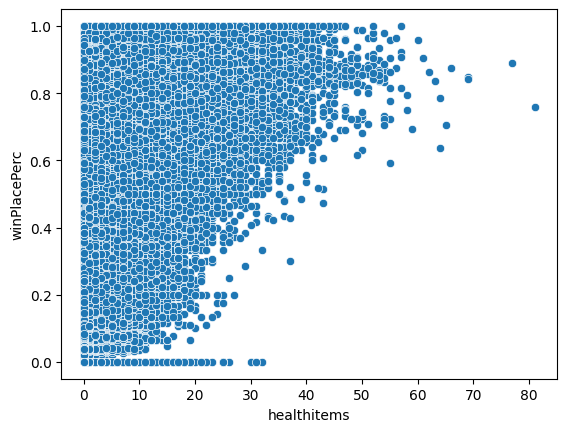

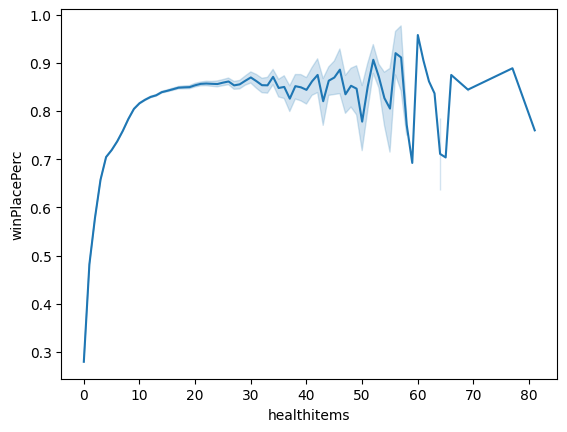

In [47]:
sns.histplot(x=df1.healthitems, kde = True)
plt.show()
sns.boxplot(x=df1.healthitems)
plt.show()
sns.countplot(x=df1.healthitems)
plt.show()
sns.scatterplot(x=df1.healthitems, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.healthitems, y=df1.winPlacePerc)
plt.show()

### totalDistance

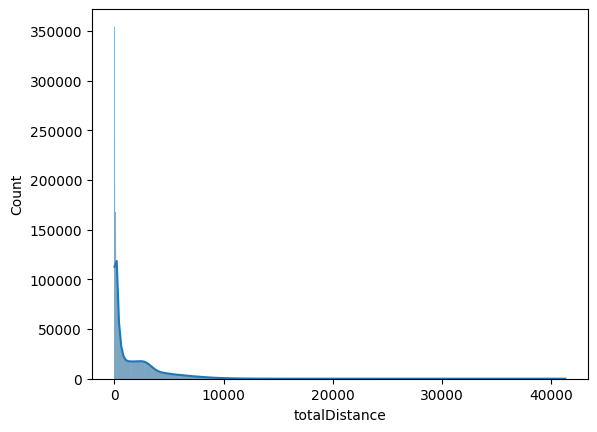

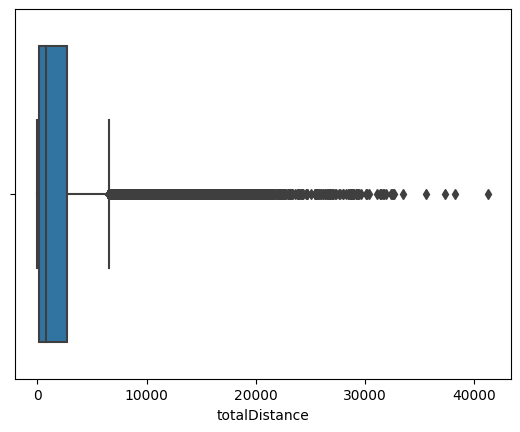

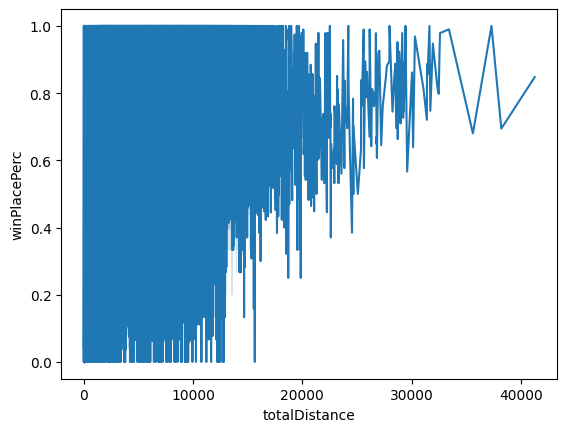

In [48]:
sns.histplot(x=df1.totalDistance, kde = True)
plt.show()
sns.boxplot(x=df1.totalDistance)
plt.show()
# sns.countplot(x=df1.totalDistance)
plt.show()
# sns.scatterplot(x=df1.totalDistance, y=df1.winPlacePerc)
plt.show()
sns.lineplot(x=df1.totalDistance, y=df1.winPlacePerc)
plt.show()

In [29]:
df1.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'rankPoints', 'revives', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc', 'healthitems',
       'totalDistance'],
      dtype='object')

## Data Preprocessing

### Outlier removal

In [30]:
def out_calc(i):
  q1 = np.percentile(df1[i], 25)
  q3 = np.percentile(df1[i], 75)
  print(f'q1 = {q1}, q3 = {q3}')
  iqr = q3 - q1
  print('iqr = ', iqr)
  upper = q3 + (1.5 * iqr)
  lower = q1 - (1.5 * iqr)
  print(f'upper = {upper}, lower = {lower}')
  print('Median = ', df1[i].median())

  # 3 sigma rule
  upperlimit = df1[i].mean() + 3*df1[i].std()
  lowerlimit = df1[i].mean() - 3*df1[i].std()
  print(f'Upperlimit = {upperlimit}, lowerlimit = {lowerlimit}')
  return(upper)

### Assists

In [31]:
i = 'assists'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of assists : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 1.9995341817050651, lowerlimit = -1.5319043414949085


In [32]:
df1.loc[df1.assists > upper].count()

assists            779306
damageDealt        779306
DBNOs              779306
headshotKills      779306
killPlace          779306
kills              779306
killStreaks        779306
longestKill        779306
matchDuration      779306
matchType          779306
maxPlace           779306
rankPoints         779306
revives            779306
roadKills          779306
teamKills          779306
vehicleDestroys    779306
weaponsAcquired    779306
winPlacePerc       779306
healthitems        779306
totalDistance      779306
dtype: int64

### DamageDealt

In [33]:
i = 'damageDealt'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of damageDealt : 
q1 = 0.0, q3 = 186.0
iqr =  186.0
upper = 465.0, lower = -279.0
Median =  84.23999786376953
Upperlimit = 640.3780364990234, lowerlimit = -378.9436492919922


In [34]:
df1.loc[df1.damageDealt > upper].count()

assists            215546
damageDealt        215546
DBNOs              215546
headshotKills      215546
killPlace          215546
kills              215546
killStreaks        215546
longestKill        215546
matchDuration      215546
matchType          215546
maxPlace           215546
rankPoints         215546
revives            215546
roadKills          215546
teamKills          215546
vehicleDestroys    215546
weaponsAcquired    215546
winPlacePerc       215546
healthitems        215546
totalDistance      215546
dtype: int64

### DBNOs

In [35]:
i = 'DBNOs'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of DBNOs : 
q1 = 0.0, q3 = 1.0
iqr =  1.0
upper = 2.5, lower = -1.5
Median =  0.0
Upperlimit = 4.095103679034301, lowerlimit = -2.7793526703690667


In [36]:
df1.loc[df1.DBNOs > upper].count()

assists            294831
damageDealt        294831
DBNOs              294831
headshotKills      294831
killPlace          294831
kills              294831
killStreaks        294831
longestKill        294831
matchDuration      294831
matchType          294831
maxPlace           294831
rankPoints         294831
revives            294831
roadKills          294831
teamKills          294831
vehicleDestroys    294831
weaponsAcquired    294831
winPlacePerc       294831
healthitems        294831
totalDistance      294831
dtype: int64

### HeadshotKills

In [37]:
i = 'headshotKills'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of headshotKills : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 2.033285416257397, lowerlimit = -1.5796462384449288


In [38]:
df1.loc[df1.headshotKills > upper].count()

assists            750850
damageDealt        750850
DBNOs              750850
headshotKills      750850
killPlace          750850
kills              750850
killStreaks        750850
longestKill        750850
matchDuration      750850
matchType          750850
maxPlace           750850
rankPoints         750850
revives            750850
roadKills          750850
teamKills          750850
vehicleDestroys    750850
weaponsAcquired    750850
winPlacePerc       750850
healthitems        750850
totalDistance      750850
dtype: int64

### KillPlace

In [39]:
i = 'killPlace'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of killPlace : 
q1 = 24.0, q3 = 71.0
iqr =  47.0
upper = 141.5, lower = -46.5
Median =  47.0
Upperlimit = 129.98816126388783, lowerlimit = -34.78946084656961


In [40]:
df1.loc[df1.killPlace > upper].count()

assists            0
damageDealt        0
DBNOs              0
headshotKills      0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       0
healthitems        0
totalDistance      0
dtype: int64

### Kills

In [41]:
i = 'kills'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of kills : 
q1 = 0.0, q3 = 1.0
iqr =  1.0
upper = 2.5, lower = -1.5
Median =  0.0
Upperlimit = 5.600117283864128, lowerlimit = -3.7505506355020763


In [42]:
df1.loc[df1.kills > upper].count()

assists            516699
damageDealt        516699
DBNOs              516699
headshotKills      516699
killPlace          516699
kills              516699
killStreaks        516699
longestKill        516699
matchDuration      516699
matchType          516699
maxPlace           516699
rankPoints         516699
revives            516699
roadKills          516699
teamKills          516699
vehicleDestroys    516699
weaponsAcquired    516699
winPlacePerc       516699
healthitems        516699
totalDistance      516699
dtype: int64

### KillStreaks

In [43]:
i = 'killStreaks'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of killStreaks : 
q1 = 0.0, q3 = 1.0
iqr =  1.0
upper = 2.5, lower = -1.5
Median =  0.0
Upperlimit = 2.676871414279785, lowerlimit = -1.588961140173799


In [44]:
df1.loc[df1.killStreaks > upper].count()

assists            52340
damageDealt        52340
DBNOs              52340
headshotKills      52340
killPlace          52340
kills              52340
killStreaks        52340
longestKill        52340
matchDuration      52340
matchType          52340
maxPlace           52340
rankPoints         52340
revives            52340
roadKills          52340
teamKills          52340
vehicleDestroys    52340
weaponsAcquired    52340
winPlacePerc       52340
healthitems        52340
totalDistance      52340
dtype: int64

### LongestKill

In [45]:
i = 'longestKill'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of longestKill : 
q1 = 0.0, q3 = 21.31999969482422
iqr =  21.31999969482422
upper = 53.29999923706055, lower = -31.979999542236328
Median =  0.0
Upperlimit = 177.42586708068848, lowerlimit = -131.4306697845459


In [46]:
df1.loc[df1.longestKill > upper].count()

assists            614427
damageDealt        614427
DBNOs              614427
headshotKills      614427
killPlace          614427
kills              614427
killStreaks        614427
longestKill        614427
matchDuration      614427
matchType          614427
maxPlace           614427
rankPoints         614427
revives            614427
roadKills          614427
teamKills          614427
vehicleDestroys    614427
weaponsAcquired    614427
winPlacePerc       614427
healthitems        614427
totalDistance      614427
dtype: int64

### MatchDuration

In [47]:
i = 'matchDuration'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of matchDuration : 
q1 = 1367.0, q3 = 1851.0
iqr =  484.0
upper = 2577.0, lower = 641.0
Median =  1438.0
Upperlimit = 2355.7260090538343, lowerlimit = 803.2868702890706


In [48]:
df1.loc[df1.matchDuration < upper].count()

assists            4446966
damageDealt        4446966
DBNOs              4446966
headshotKills      4446966
killPlace          4446966
kills              4446966
killStreaks        4446966
longestKill        4446966
matchDuration      4446966
matchType          4446966
maxPlace           4446966
rankPoints         4446966
revives            4446966
roadKills          4446966
teamKills          4446966
vehicleDestroys    4446966
weaponsAcquired    4446966
winPlacePerc       4446965
healthitems        4446966
totalDistance      4446966
dtype: int64

### MatchType

In [49]:
i = 'matchType'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of matchType : 
q1 = 3.0, q3 = 15.0
iqr =  12.0
upper = 33.0, lower = -15.0
Median =  14.0
Upperlimit = 26.80840993779413, lowerlimit = -5.148772333189102


In [50]:
df1.loc[df1.matchType > upper].count()

assists            0
damageDealt        0
DBNOs              0
headshotKills      0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       0
healthitems        0
totalDistance      0
dtype: int64

### MaxPlace

In [51]:
i = 'maxPlace'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of maxPlace : 
q1 = 28.0, q3 = 49.0
iqr =  21.0
upper = 80.5, lower = -3.5
Median =  30.0
Upperlimit = 115.9889865151552, lowerlimit = -26.979646214374846


In [52]:
df1.loc[df1.maxPlace > upper].count()

assists            701861
damageDealt        701861
DBNOs              701861
headshotKills      701861
killPlace          701861
kills              701861
killStreaks        701861
longestKill        701861
matchDuration      701861
matchType          701861
maxPlace           701861
rankPoints         701861
revives            701861
roadKills          701861
teamKills          701861
vehicleDestroys    701861
weaponsAcquired    701861
winPlacePerc       701861
healthitems        701861
totalDistance      701861
dtype: int64

### RankPoints

In [53]:
i = 'rankPoints'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of rankPoints : 
q1 = -1.0, q3 = 1500.0
iqr =  1501.0
upper = 3751.5, lower = -2252.5
Median =  1443.0
Upperlimit = 3101.9537945706643, lowerlimit = -1317.9328814357314


In [54]:
df1.loc[df1.rankPoints > upper].count()

assists            62
damageDealt        62
DBNOs              62
headshotKills      62
killPlace          62
kills              62
killStreaks        62
longestKill        62
matchDuration      62
matchType          62
maxPlace           62
rankPoints         62
revives            62
roadKills          62
teamKills          62
vehicleDestroys    62
weaponsAcquired    62
winPlacePerc       62
healthitems        62
totalDistance      62
dtype: int64

### Revives

In [55]:
i = 'revives'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of revives : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 1.5811603004322927, lowerlimit = -1.2518422890060752


In [56]:
df1.loc[df1.revives > upper].count()

assists            587099
damageDealt        587099
DBNOs              587099
headshotKills      587099
killPlace          587099
kills              587099
killStreaks        587099
longestKill        587099
matchDuration      587099
matchType          587099
maxPlace           587099
rankPoints         587099
revives            587099
roadKills          587099
teamKills          587099
vehicleDestroys    587099
weaponsAcquired    587099
winPlacePerc       587099
healthitems        587099
totalDistance      587099
dtype: int64

### RoadKills

In [57]:
i = 'roadKills'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of roadKills : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 0.2236149915443264, lowerlimit = -0.2166228085593429


In [58]:
df1.loc[df1.roadKills > upper].count()

assists            12996
damageDealt        12996
DBNOs              12996
headshotKills      12996
killPlace          12996
kills              12996
killStreaks        12996
longestKill        12996
matchDuration      12996
matchType          12996
maxPlace           12996
rankPoints         12996
revives            12996
roadKills          12996
teamKills          12996
vehicleDestroys    12996
weaponsAcquired    12996
winPlacePerc       12996
healthitems        12996
totalDistance      12996
dtype: int64

### TeamKills

In [59]:
i = 'teamKills'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of teamKills : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 0.5260489158847216, lowerlimit = -0.4783120993675726


In [60]:
df1.loc[df1.teamKills > upper].count()

assists            96930
damageDealt        96930
DBNOs              96930
headshotKills      96930
killPlace          96930
kills              96930
killStreaks        96930
longestKill        96930
matchDuration      96930
matchType          96930
maxPlace           96930
rankPoints         96930
revives            96930
roadKills          96930
teamKills          96930
vehicleDestroys    96930
weaponsAcquired    96930
winPlacePerc       96930
healthitems        96930
totalDistance      96930
dtype: int64

### VehicleDestroys

In [61]:
i = 'vehicleDestroys'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of vehicleDestroys : 
q1 = 0.0, q3 = 0.0
iqr =  0.0
upper = 0.0, lower = 0.0
Median =  0.0
Upperlimit = 0.28575290696467204, lowerlimit = -0.26991649175484134


In [62]:
df1.loc[df1.vehicleDestroys > upper].count()

assists            33754
damageDealt        33754
DBNOs              33754
headshotKills      33754
killPlace          33754
kills              33754
killStreaks        33754
longestKill        33754
matchDuration      33754
matchType          33754
maxPlace           33754
rankPoints         33754
revives            33754
roadKills          33754
teamKills          33754
vehicleDestroys    33754
weaponsAcquired    33754
winPlacePerc       33754
healthitems        33754
totalDistance      33754
dtype: int64

### TotalDistance

In [63]:
i = 'totalDistance'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of totalDistance : 
q1 = 158.10000610351562, q3 = 2728.4467163085938
iqr =  2570.346710205078
upper = 6583.966781616211, lower = -3697.4200592041016
Median =  788.2000122070312
Upperlimit = 8290.282104492188, lowerlimit = -4760.5938720703125


In [64]:
df1.loc[df1.totalDistance > upper].count()

assists            207666
damageDealt        207666
DBNOs              207666
headshotKills      207666
killPlace          207666
kills              207666
killStreaks        207666
longestKill        207666
matchDuration      207666
matchType          207666
maxPlace           207666
rankPoints         207666
revives            207666
roadKills          207666
teamKills          207666
vehicleDestroys    207666
weaponsAcquired    207666
winPlacePerc       207666
healthitems        207666
totalDistance      207666
dtype: int64

### HealthItems

In [65]:
i = 'healthitems'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of healthitems : 
q1 = 0.0, q3 = 4.0
iqr =  4.0
upper = 10.0, lower = -6.0
Median =  1.0
Upperlimit = 14.117009744484339, lowerlimit = -9.162899908699671


In [66]:
df1.loc[df1.healthitems > upper].count()

assists            222144
damageDealt        222144
DBNOs              222144
headshotKills      222144
killPlace          222144
kills              222144
killStreaks        222144
longestKill        222144
matchDuration      222144
matchType          222144
maxPlace           222144
rankPoints         222144
revives            222144
roadKills          222144
teamKills          222144
vehicleDestroys    222144
weaponsAcquired    222144
winPlacePerc       222144
healthitems        222144
totalDistance      222144
dtype: int64

### WeaponsAcquired

In [67]:
i = 'weaponsAcquired'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of weaponsAcquired : 
q1 = 2.0, q3 = 5.0
iqr =  3.0
upper = 9.5, lower = -2.5
Median =  3.0
Upperlimit = 11.030118491222723, lowerlimit = -3.709143246527799


In [68]:
df1.loc[df1.weaponsAcquired > upper].count()

assists            78409
damageDealt        78409
DBNOs              78409
headshotKills      78409
killPlace          78409
kills              78409
killStreaks        78409
longestKill        78409
matchDuration      78409
matchType          78409
maxPlace           78409
rankPoints         78409
revives            78409
roadKills          78409
teamKills          78409
vehicleDestroys    78409
weaponsAcquired    78409
winPlacePerc       78409
healthitems        78409
totalDistance      78409
dtype: int64

### WinPlacePerc

In [69]:
i = 'winPlacePerc'
print(f'The IQR & 3 Sigma rule values of {i} : ')
upper = out_calc(i)

The IQR & 3 Sigma rule values of winPlacePerc : 
q1 = nan, q3 = nan
iqr =  nan
upper = nan, lower = nan
Median =  0.45829999446868896
Upperlimit = 1.3932341635227203, lowerlimit = -0.44759055972099304


In [70]:
df1.loc[df1.winPlacePerc > upper].count()

assists            0
damageDealt        0
DBNOs              0
headshotKills      0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       0
healthitems        0
totalDistance      0
dtype: int64

## Obervation :
1. Outliers are numerous to remove from the dataset for accurate reading
2. KillPlace, weaponsAcquired, healthitems & totalDistance are the main features that affect the winPlacePerc the most as such these factors are marked as the most desired features to be ranked high in the game.

## Data Preprocessing

### Null value and data corruption removal

In [71]:
df1.isnull().sum()

assists            0
damageDealt        0
DBNOs              0
headshotKills      0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       1
healthitems        0
totalDistance      0
dtype: int64

In [72]:
df1.loc[df1.winPlacePerc.isnull()==True, 'winPlacePerc'] = df1.winPlacePerc.median()

In [73]:
df1.isnull().sum()

assists            0
damageDealt        0
DBNOs              0
headshotKills      0
killPlace          0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
rankPoints         0
revives            0
roadKills          0
teamKills          0
vehicleDestroys    0
weaponsAcquired    0
winPlacePerc       0
healthitems        0
totalDistance      0
dtype: int64

In [74]:
df1.min()

assists            0.0
damageDealt        0.0
DBNOs              0.0
headshotKills      0.0
killPlace          1.0
kills              0.0
killStreaks        0.0
longestKill        0.0
matchDuration      9.0
matchType          0.0
maxPlace           1.0
rankPoints        -1.0
revives            0.0
roadKills          0.0
teamKills          0.0
vehicleDestroys    0.0
weaponsAcquired    0.0
winPlacePerc       0.0
healthitems        0.0
totalDistance      0.0
dtype: float32

In [75]:
df1.loc[df1.rankPoints<0].count()

assists            1701810
damageDealt        1701810
DBNOs              1701810
headshotKills      1701810
killPlace          1701810
kills              1701810
killStreaks        1701810
longestKill        1701810
matchDuration      1701810
matchType          1701810
maxPlace           1701810
rankPoints         1701810
revives            1701810
roadKills          1701810
teamKills          1701810
vehicleDestroys    1701810
weaponsAcquired    1701810
winPlacePerc       1701810
healthitems        1701810
totalDistance      1701810
dtype: int64

In [76]:
df1.loc[df1.rankPoints < 0, 'rankPoints'] = df1.rankPoints.median()

In [77]:
df1.min()

assists            0.0
damageDealt        0.0
DBNOs              0.0
headshotKills      0.0
killPlace          1.0
kills              0.0
killStreaks        0.0
longestKill        0.0
matchDuration      9.0
matchType          0.0
maxPlace           1.0
rankPoints         0.0
revives            0.0
roadKills          0.0
teamKills          0.0
vehicleDestroys    0.0
weaponsAcquired    0.0
winPlacePerc       0.0
healthitems        0.0
totalDistance      0.0
dtype: float32

## Train-Test Split

In [78]:
x = df1.drop(['winPlacePerc'], axis=1).copy()
x.columns

Index(['assists', 'damageDealt', 'DBNOs', 'headshotKills', 'killPlace',
       'kills', 'killStreaks', 'longestKill', 'matchDuration', 'matchType',
       'maxPlace', 'rankPoints', 'revives', 'roadKills', 'teamKills',
       'vehicleDestroys', 'weaponsAcquired', 'healthitems', 'totalDistance'],
      dtype='object')

In [79]:
y = df1.winPlacePerc
y.value_counts()

0.0000    220505
1.0000    127573
0.5000     55065
0.3333     42508
0.6667     38112
           ...  
0.5962         1
0.7167         1
0.8197         1
0.1639         1
0.2879         1
Name: winPlacePerc, Length: 3000, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split as tts

In [81]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.2, random_state=10)

## Converting Pandas Dataframe to Dask Dataframe

In [82]:
ddf_x = dd.from_pandas(xtrain, npartitions=4)
ddf_y = dd.from_pandas(ytrain, npartitions = 4)
ddf_x1 = dd.from_pandas(xtest, npartitions=4)
ddf_y1 = dd.from_pandas(ytest, npartitions = 4)

### Scaler

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
scaler = RobustScaler()
scaler.fit(ddf_x)
xscale_train = scaler.transform(ddf_x)
xscale_test = scaler.transform(ddf_x1)

## Regression Accuracy Calculation

In [85]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### adj_r2 = 1 - (n - 1) / (n - p - 1) * (1 - r2_score)

where

n is the number of observations/predictions (len(ypred)

p is the number of predictors/ independent features considered (len(xtest.columns))

r2_score is the R-squared score

## adj_r2 = 1 - ((1-r2_score) * (len(ypred)-(no of xtest_columns)))/(len(ypred)-(no of xtest_columns)-1)

In [86]:
def adjr2(r2, n, p):
    return(1 - ((1 - r2) * (n-p)) / (n-p-1))


def reg_acc(original, prediction, n, p):
    r2 = r2_score(original, prediction)
    print('R2 : ', r2)
    print('MSE : ', mean_squared_error(original, prediction))
    print('Mean_Absolute_Error : ', mean_absolute_error(original, prediction))
    print('Root_mean_square : ', np.sqrt(mean_squared_error(original, prediction)))
    adj_r2 = adjr2(r2, n, p)
    print('Adj_R2 : ', adj_r2)


## Model

## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

### Fitting

In [88]:
rf = RandomForestRegressor(n_estimators = 30, verbose = 2, n_jobs=-1)
rf.fit(ddf_x, ddf_y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.2min finished


RandomForestRegressor(n_estimators=30, n_jobs=-1, verbose=2)

### Prediction

In [89]:
ypred = rf.predict(ddf_x1)

n = len(ypred)
p = len(ddf_x.columns)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:   37.8s finished


### Prediction Accuracy

In [90]:
print(reg_acc(ddf_y1, ypred, n, p))

R2 :  0.919600251056891
MSE :  0.007589885894783111
Mean_Absolute_Error :  0.0621442151609024
Root_mean_square :  0.08711995118675808
Adj_R2 :  0.9196001606565095
None


## Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

### Model Selection

In [92]:
# Create a linear regression model
lr = LinearRegression(n_jobs=-1)

### Model Fit

In [93]:
lr.fit(ddf_x, ddf_y)

LinearRegression(n_jobs=-1)

### Prediction

In [94]:
ypred_lr = lr.predict(ddf_x1)

n = len(ypred_lr)
p = len(ddf_x.columns)

### Prediction Accuracy

In [95]:
print(reg_acc(ddf_y1, ypred_lr, n, p))

R2 :  0.7776543382005173
MSE :  0.02098984
Mean_Absolute_Error :  0.10728143
Root_mean_square :  0.14487872
Adj_R2 :  0.7776540881980867
None


### LightGBM

In [101]:
from lightgbm import LGBMRegressor

### Model Selection

In [103]:
lgbmr = LGBMRegressor()

### Model fit

In [104]:
lgbmr.fit(ddf_x, ddf_y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.117254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1694
[LightGBM] [Info] Number of data points in the train set: 3557572, number of used features: 19
[LightGBM] [Info] Start training from score 0.472750


LGBMRegressor()

### Prediction

In [105]:
ypred_lgbmr = lgbmr.predict(ddf_x1)

n = len(ypred_lgbmr)
p = len(ddf_x.columns)

### Prediction Accuracy

In [106]:
print(reg_acc(ddf_y1, ypred_lgbmr, n, p))

R2 :  0.9194868277096189
MSE :  0.0076005932698050005
Mean_Absolute_Error :  0.06276991516587206
Root_mean_square :  0.08718138144010452
Adj_R2 :  0.9194867371817057
None


### Gradient Boosting Regressor

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

### Model Selection

In [113]:
xgb = GradientBoostingRegressor(verbose=2)

### Model fit

In [114]:
xgb.fit(ddf_x, ddf_y)

      Iter       Train Loss   Remaining Time 
         1           0.0804           16.40m
         2           0.0689           16.34m
         3           0.0595           16.00m
         4           0.0519           15.89m
         5           0.0457           15.75m
         6           0.0406           15.52m
         7           0.0364           15.27m
         8           0.0329           15.06m
         9           0.0300           14.85m
        10           0.0277           14.66m
        11           0.0257           14.45m
        12           0.0241           14.24m
        13           0.0227           14.05m
        14           0.0215           13.86m
        15           0.0205           13.68m
        16           0.0196           13.51m
        17           0.0188           13.35m
        18           0.0182           13.23m
        19           0.0177           13.15m
        20           0.0172           13.01m
        21           0.0167           12.83m
        2

GradientBoostingRegressor(verbose=2)

### Prediction

In [115]:
ypred_xgb = xgb.predict(ddf_x1)

n = len(ypred_xgb)
p = len(ddf_x.columns)

### Prediction Accuracy

In [116]:
print(reg_acc(ddf_y1, ypred_xgb, n, p))

R2 :  0.8909790252121794
MSE :  0.010291782868166593
Mean_Absolute_Error :  0.07223233697986349
Root_mean_square :  0.10144842467069952
Adj_R2 :  0.8909789026304817
None


# Conclusion

After conducting a comparison between the linear regression, Gradient Booster, LightGBM and random forest regressor models, we obtained an accuracy score of 91.96% as the highest from the random forest regressor. This indicates that the random forest regressor outperformed the linear regression model in predicting the game winner place.

The random forest regressor/Gradient Booster regressor/LightGBM are powerful machine learning algorithms that utilizes decision trees to make accurate predictions. They are known for their ability to handle complex data and produce highly accurate results. In contrast, linear regression is a simpler algorithm that assumes a linear relationship between the input variables and the output variable. While it may work well for certain datasets, it may not be suitable for more complex datasets with nonlinear relationships.

Based on the results of the comparison, we can confidently conclude that the random forest regressor is the best fit model for predicting the game winner place. Its superior performance over the other models indicates that it is better equipped to handle the complexity of the dataset and make accurate predictions. This finding highlights the importance of choosing the appropriate machine learning algorithm for a given dataset and problem.